In [109]:
# Open VSCode and create a new project folder for your machine learning project.
# Open the terminal in VSCode by going to Terminal > New Terminal.
# Create a new environment using conda or pip. For example, to create a new environment with conda:
#     conda create --name myenv
#     conda activate myenv
# Install the necessary packages for your machine learning project. For example, to install scikit-learn:
#     conda install pandas numpy scikit-learn flask
#     pip install -r requirements.txt             use this if you had initially loaded some packages to the file
# Export the dependencies of your project by running the command:
#     pip freeze > requirements.txt

<br>Table of Content:
* [Import Libraries](#1)
* [Load Data](#2)
* [Exploratory Data Analysis (EDA)](#3)
* [Data Preprocessing](#4)
    * [Data Cleaning](#4a)
    * [Data Transformation](#4b)
    * [Handling Imbalanced Data](#4c)
    * [Data Reduction](#4d)
* [Selecting and Training the Model](#5) 
* [Model Evaluation](#6) 
* [Feature Engineering](#7) 
* [Model Optimization](#8) 
* [Model Deployment](#9) 

<a id="1"></a> <br>
## Import Libraries

In [110]:
# Data Analysis      
import pandas as pd          # data analysis library for handling structured data             
import numpy as np           # mathematical library for working with numerical data
from metrics import *

# Visualization
import matplotlib.pyplot as plt     # data visualization library for creating graphs and charts
%matplotlib inline
import seaborn as sns        # data visualization library based on matplotlib for creating more attractive visualizations
import missingno as msno    #visualize missing data


# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000) 

> Demo

In [111]:
# import pandas as pd

# experiment_1 = pd.read_csv('exp1', index_col='time', parse_dates=True)
# experiment_2 = pd.read_csv('exp2', index_col='time', parse_dates=True)
# # Repeat for all experiments...
# experiment_10 = pd.read_csv('exp10', index_col='time', parse_dates=True)

# # Combine all experiments into a list for easy processing
# experiments = [experiment_1, experiment_2, ..., experiment_10]



# # CONVERT DATAFRAMES TO PYTORCH 
# import torch

# def df_to_tensor(df):
#     # Assuming 'df' is preprocessed and ready for conversion
#     # Convert df values to tensor
#     return torch.tensor(df.values, dtype=torch.float32)

# # Convert each experiment to a tensor and store in a new list
# tensor_experiments = [df_to_tensor(df) for df in experiments]




# # PREPARE DATALOADERS
# from torch.utils.data import TensorDataset, DataLoader

# # Combine original features with extra parameters (one approach)
# combined_data = np.concatenate([tensor_experiments, extra_params], axis=-1)  # New shape [n_experiments, time_steps, n_features + n_extra_features]

# # Example targets for demonstration
# # In a real scenario, replace 'dummy_targets' with your actual targets
# dummy_targets = torch.rand(len(tensor_experiments), output_dim)  # Randomly generated targets

# # Create TensorDataset and DataLoader
# dataset = TensorDataset(torch.stack(tensor_experiments), dummy_targets)
# dataloader = DataLoader(dataset, batch_size=2, shuffle=True)




# # BUILDING THE MODEL


#     # Tips 
#         #1. Consider Multi-Task Learning (MTL):
#             # Multi-Task Learning is a learning paradigm in machine learning where multiple learning tasks are solved at the same time, 
#             # while exploiting commonalities and differences across tasks. This approach can lead to improved learning efficiency and 
#             # prediction accuracy for the task models, especially when the tasks are related. In deep learning, this often involves 
#             # sharing layers between tasks, while having some task-specific layers towards the end of the mode 
            
#             # Imagine you have a dataset from your experiments, and you want to predict 4 main outputs, but you also have 3 other 
#             # parameters that are somewhat related and you believe predicting them could help improve the performance of your main task.
            
#             # In this example, MultiTaskLSTM is designed to make predictions for both the main task and an auxiliary task using shared 
#             # LSTM layers for feature extraction, and separate fully connected layers for each task's specific output.
            
            
#         # 2. Consider Attention Mechanisms (Best to use Transformer ones)
#             # Attention mechanisms allow models to focus on different parts of the input for each output part, improving the ability of 
#             # the model to capture dependencies, especially in sequences. In deep learning, attention mechanisms can dynamically weight 
#             # the importance of input elements.
            
#             # example: In this AttentionModel, an attention mechanism is applied to the output of an LSTM layer. The model computes 
#             # attention weights for each element in the sequence, which are then used to create a weighted sum (context vector) 
#             # representing the input sequence. This context vector is then fed into a fully connected layer to produce the final output.

<a id="2"></a> <br>
## Load Data

In [112]:
import os

os.chdir(r"C:\Users\pault\OneDrive - University of Oklahoma\GRA - Bio-Manufacturing\1. ML-Cytovance-OU-Research")

In [113]:
# adding attribute name to each dataframe

def add_attribute_name(df_list, df_name):
    """
    Adds an attribute name to each DataFrame in a list.

    :param df_list: List of pandas DataFrames to add attribute names to.
    :param attribute_name: Name of the attribute to add.
    :return: List of DataFrames with attribute names.
    """
    for index, df in enumerate(df_list, start=1):
        df.name = f"{df_name[index-1]}"
        
    return df_list



In [114]:

experiment_names = ['exp_210623_1', 'exp_210623_2', 'exp_210623_3', 'exp_210623_4', 
                    'exp_211013_1', 'exp_211013_2', 'exp_211013_3', 'exp_211013_4', 
                    'exp_211130_1', 'exp_211130_2', 'exp_211130_3', 'exp_211130_4', 
                    'exp_220309demo_1', 'exp_220309demo_2', 'exp_220309demo_3', 'exp_220309demo_4',
                    'exp_220315c1_1', 'exp_220315c1_2', 'exp_220315c1_3', 'exp_220315c1_4', 'exp_220315c1_5', 'exp_220315c1_6',
                    'exp_220329c2_1', 'exp_220329c2_2', 'exp_220329c2_3', 'exp_220329c2_4', 'exp_220329c2_5', 'exp_220329c2_6', 
                    'exp_220822_1', 'exp_220822_2', 'exp_220822_3', 'exp_220822_4']



def load_data (experiments):
    # Load the data
    df_list = []
    for exp in experiments:
        df = pd.read_csv(f"data/final_cleaned/{exp}.csv", index_col='input_Timepoint (hr)', parse_dates=True)
        df_list.append(df)
    return df_list

# Load the data
experiment_data = load_data(experiment_names)
experiment_data = add_attribute_name(experiment_data, experiment_names)



In [143]:
# Group the loaded CSVs by experiment date (assuming the date is the first part of the experiment name before '_')
grouped_experiments = {}

for name, df in zip(experiment_names, experiment_data):
    date = name.split('_')[1]  # Extract date from the experiment name
    if date not in grouped_experiments:
        grouped_experiments[date] = [df]
    else:
        grouped_experiments[date].append(df)

# Convert the grouped experiments dictionary to a list of lists
experiment_groups = list(grouped_experiments.values())



>> Data Understanding

Randomly selected experiment: exp_211130_3
                     input_vessel_type input_vessel_volume input_vessel_name  input_agitation_rpm  input_DO_%  input_pH_setpoint  input_gas_flow  input_air_%  input_O2  input_Temp_c input_media_type input_feed_type  input_glucose_limit  output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp  output_glycerol_gl  output_glucose_gl  output_acetate_mmol_l  output_phosphate_mmol_l
input_Timepoint (hr)                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0.0  

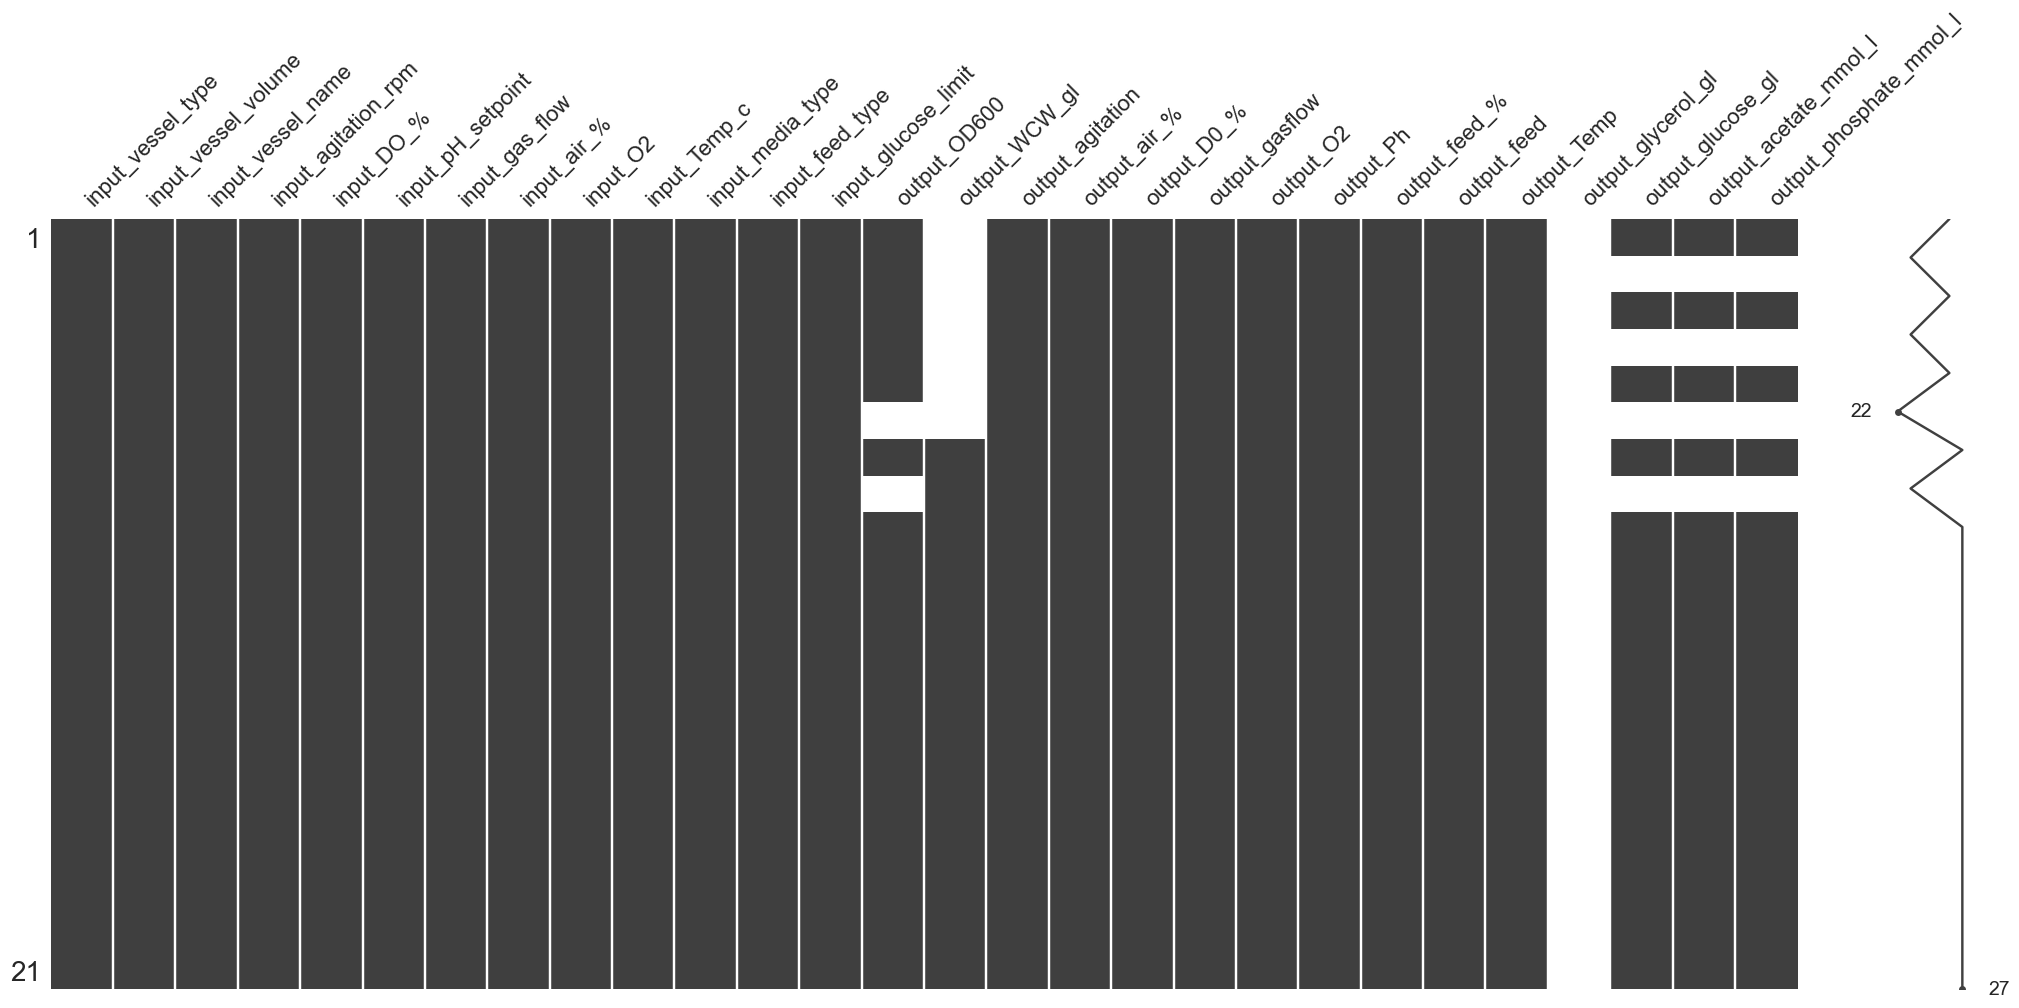

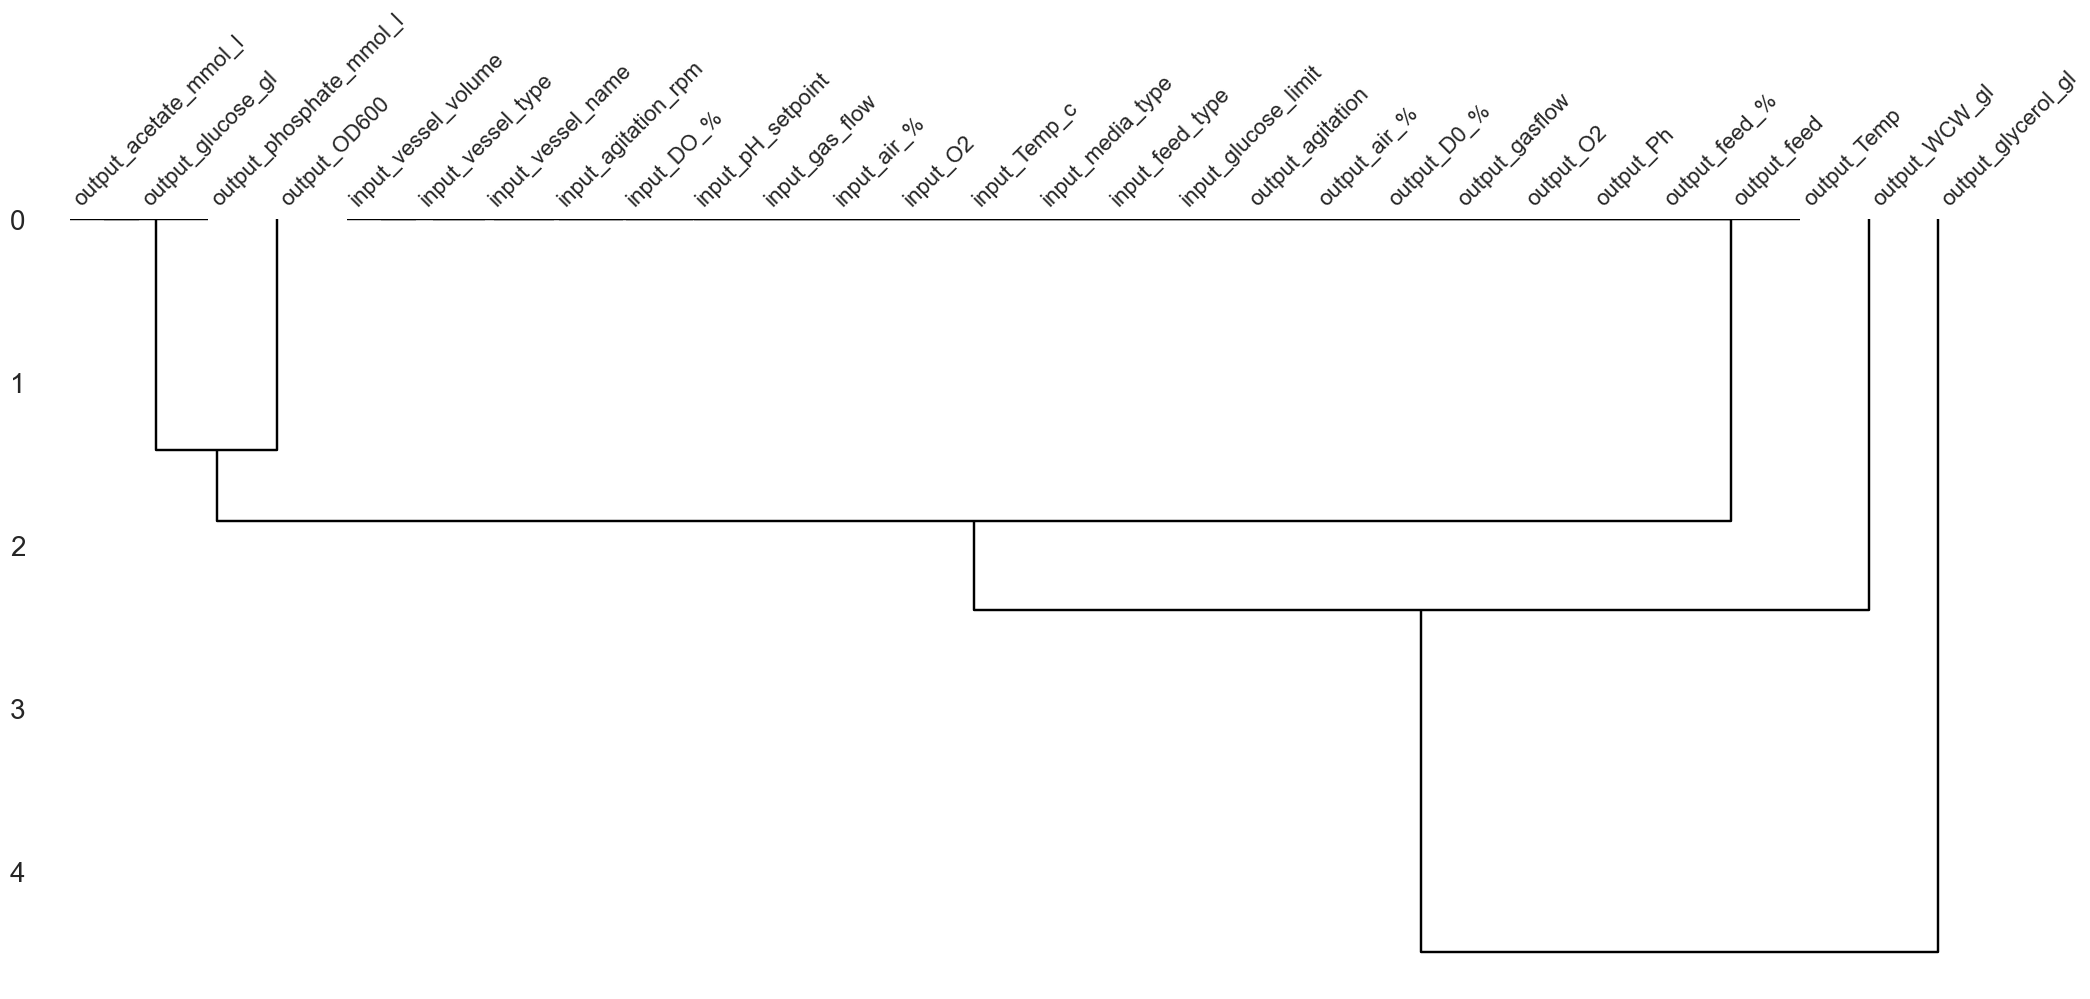

In [115]:
random_num = np.random.randint(0, len(experiment_data))


for index, df in enumerate(experiment_data):
    if random_num == index:
        print(f"Randomly selected experiment: {df.name}")
        print(df.head())
        print('------------------------------', '\n', 'Data Shape:', df.shape, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Columns:', df.columns, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Tpes:', df.dtypes, '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Info:', df.info(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data Description:', df.describe(), '\n', '------------------------------', '\n')
        print('------------------------------', '\n', 'Data NaN total:', df.isnull().sum(), '\n', '------------------------------', '\n')

        msno.matrix(df)
        msno.dendrogram(df)


In [116]:
invariant_cols = ['input_vessel_type',	'input_vessel_volume',	'input_vessel_name',	'input_agitation_rpm',	'input_DO_%',	
                  'input_pH_setpoint',	'input_gas_flow',	'input_air_%',	'input_O2',	'input_Temp_c',	'input_media_type',	
                  'input_feed_type',	'input_glucose_limit']

random_num = np.random.randint(0, len(experiment_data))

for index, df in enumerate(experiment_data):
    if random_num == index:
        print(df.name) 
        invariant_cols_values = {col: df[col].unique() for col in experiment_data[1].columns 
                                 if len(experiment_data[1][col].unique()) < 4}

invariant_cols_values 

exp_220315c1_3


{'input_vessel_type': array(['5L Fermenter'], dtype=object),
 'input_vessel_volume': array(['5000ml'], dtype=object),
 'input_vessel_name': array(['Ferm3'], dtype=object),
 'input_agitation_rpm': array([1195], dtype=int64),
 'input_DO_%': array([1], dtype=int64),
 'input_pH_setpoint': array([6.8]),
 'input_gas_flow': array([5], dtype=int64),
 'input_air_%': array([100], dtype=int64),
 'input_O2': array([0.]),
 'input_Temp_c': array([30], dtype=int64),
 'input_media_type': array(['Media type A'], dtype=object),
 'input_feed_type': array(['Glucose'], dtype=object),
 'input_glucose_limit': array([0], dtype=int64)}

In [117]:
# drop invariant columns 
use_this = [] * len(experiment_data)
for index, df in enumerate(experiment_data):
    df = df.drop(columns = invariant_cols, axis=1, inplace=True)


<a id="3"></a> <br>
## Exploratory Data Analysis (EDA)

In [125]:
experiment_data[1].columns

Index(['output_OD600', 'output_WCW_gl', 'output_agitation', 'output_air_%', 'output_D0_%', 'output_gasflow', 'output_O2', 'output_Ph', 'output_feed_%', 'output_feed', 'output_Temp', 'output_glycerol_gl', 'output_glucose_gl', 'output_acetate_mmol_l', 'output_phosphate_mmol_l'], dtype='object')

Text(0.5, 1.0, 'Correlation Heatmap for all experiments combined')

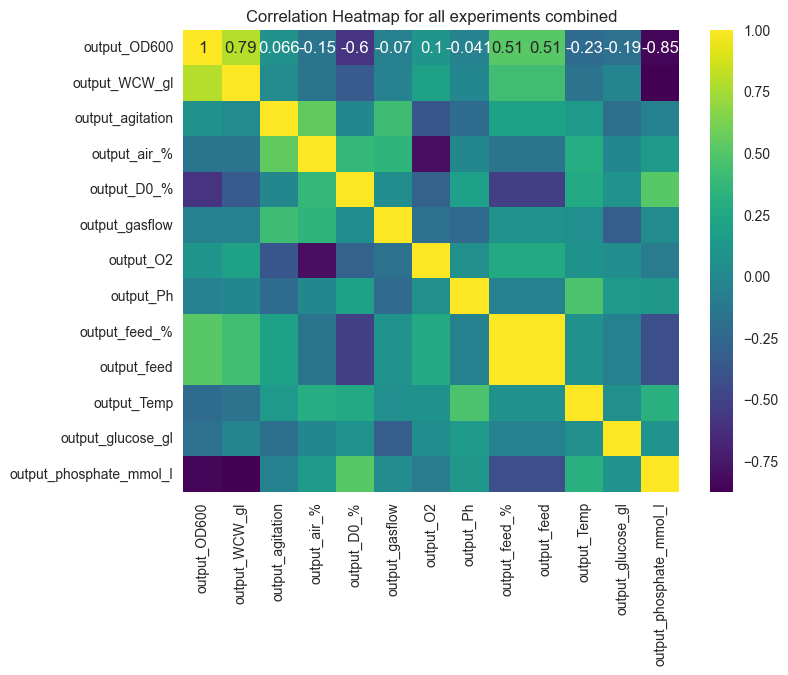

In [244]:
plt.figure(figsize=(8, 6))

# df_corr = pd.concat(experiment_data, axis=0)
df_combined = pd.concat(experiment_data, axis=0)
sns.heatmap(df_combined.select_dtypes(exclude = 'object').corr(), annot=True, cmap='viridis')
plt.title(f"Correlation Heatmap for all experiments combined")

# df_corr

In [ ]:
# there are some columns that are highly correlated with each other, 

    # output_WCW has a moderate-high correlation with:
        # output_OD600 (high correlation ) 
        # output_feed and output_feed_% (moderate correlation)
        
    # output_OD600 has a moderate-high correlation with:
        # output_WCW (high correlation )
        # output_feed and output_feed_% (moderate correlation)
    
    # output_gasflow has a moderate relationship with:
        # output_air_% (moderate-high correlation)
        # output_agitation (moderate correlation)
             
    # output_air_% and output_agitation have a moderate/strong correlation with each other


### Time Series Plots

> Feed Strategy

In [218]:
def plot_timeseries (experiment_groups, cols_to_plot, marker = '*' , linestyle='-', color=None):
    for output_col in cols_to_plot:
        fig, ax = plt.subplots(2, 4, figsize=(20, 10))  # Adjusted figsize for better visibility

        for i, exp_dfs in enumerate(experiment_groups):
            for j, df in enumerate(exp_dfs):
                # Calculate row and column index for subplots
                row = i // 4  # Integer division to get the row index
                col = i % 4  # Modulus to get the column index

                # Plot the specified output column on the subplot
                try:
                    if df[output_col].isnull != True:
                        ax[row, col].plot(df.index, df[output_col], label=output_col, marker = marker, linestyle=linestyle, color=color)
                        ax[row, col].set_xlabel('Experiment Time (hr)')
                        ax[row, col].set_ylabel(output_col)  # Set ylabel specific to the output column
                        
                        label=f"{output_col} ({getattr(df, 'name', f'DataFrame {j+1}')})"

                        ax[row, col].legend()

                        # Use the DataFrame's 'name' attribute for the subplot title, if available
                        exp_name = getattr(df, 'name', f'Exp {i+1}')
                        ax[row, col].set_title(f"{output_col} distribution for {'_'.join(exp_name.split('_')[:2])}")
                
                except:
                    pass

        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()  # Display the plot for the current output column

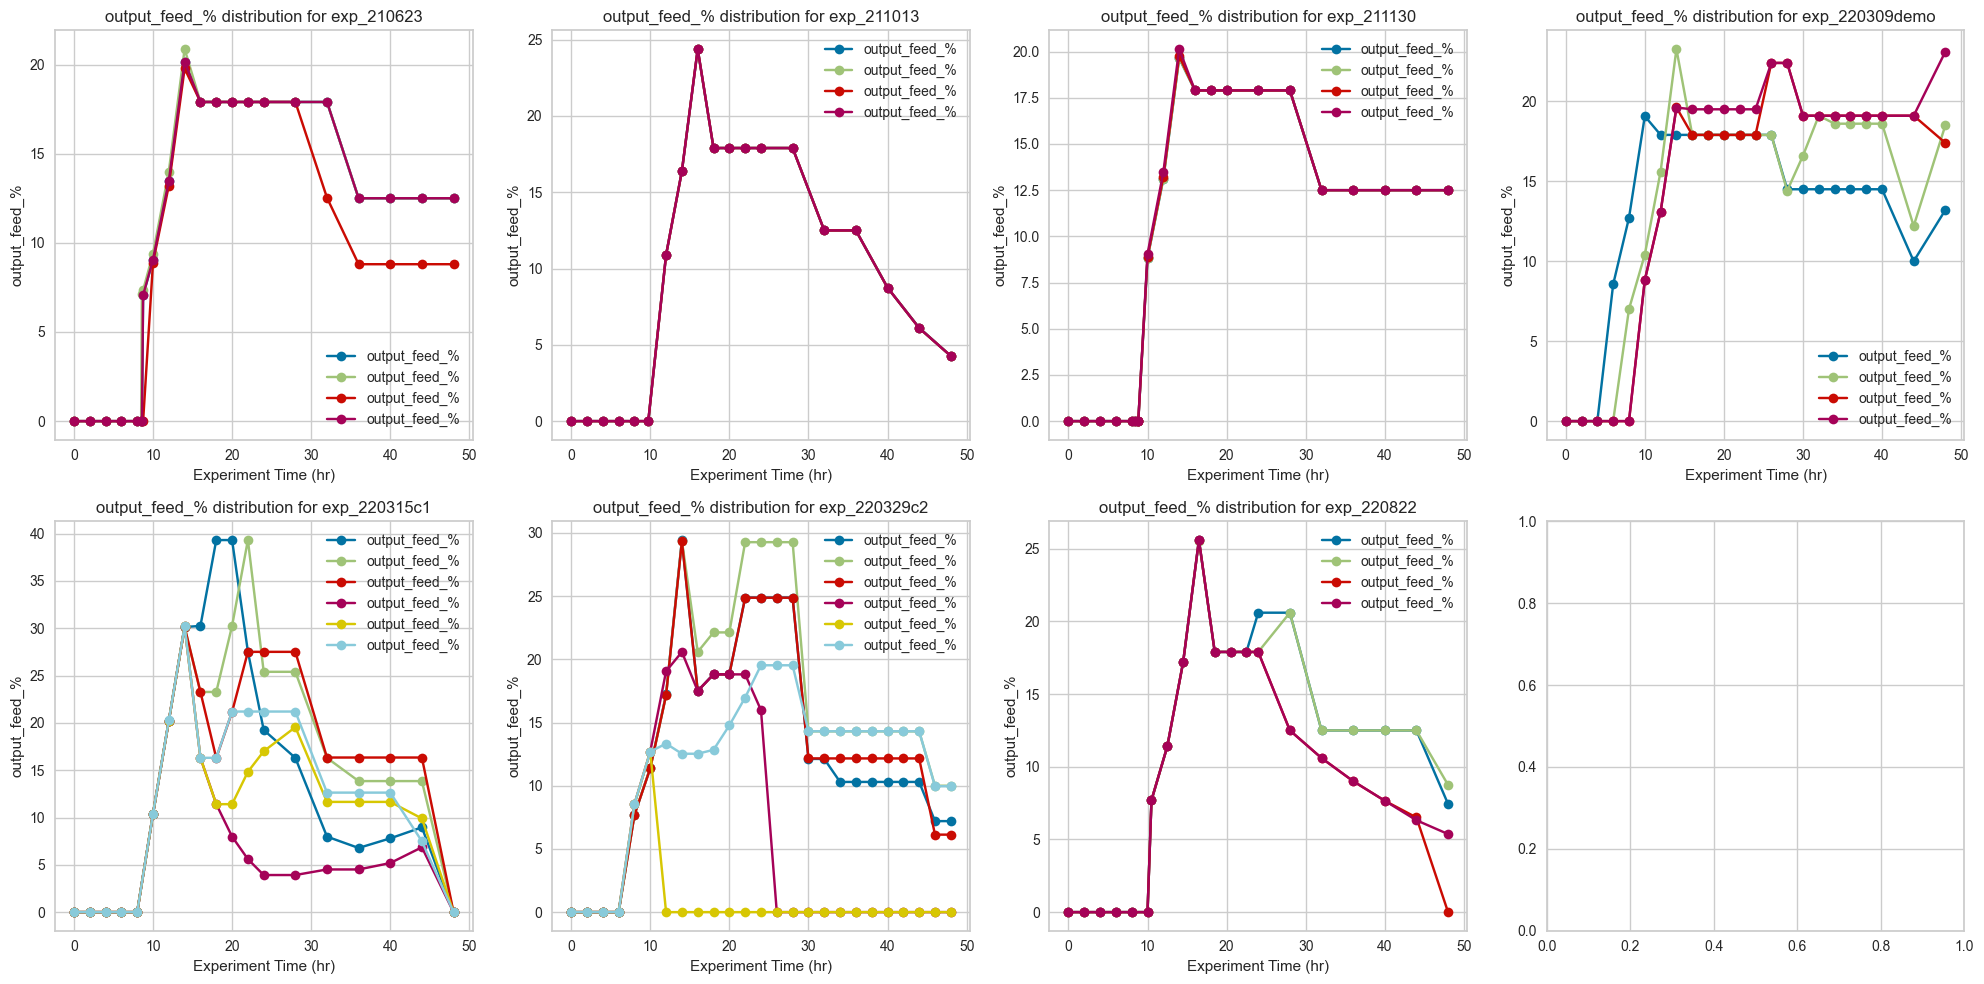

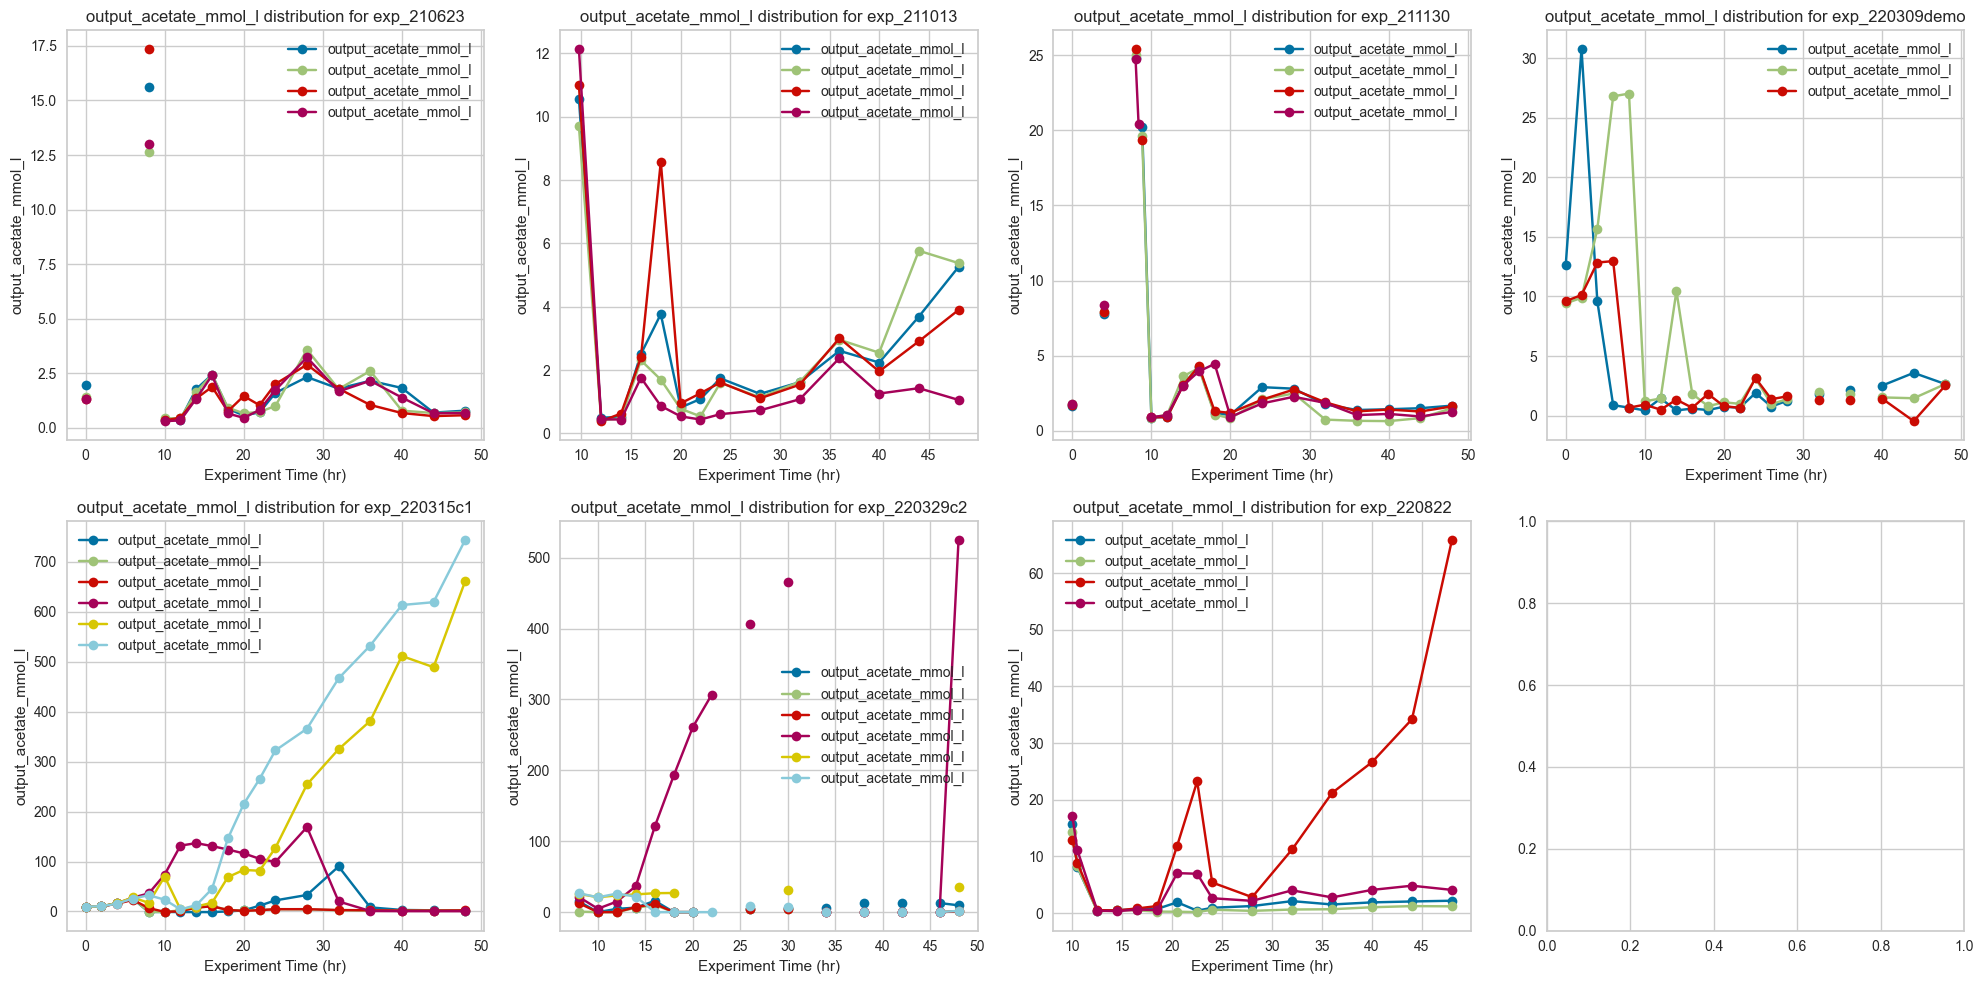

In [312]:
plot_timeseries(experiment_groups, ['output_feed_%', 'output_acetate_mmol_l'], marker = 'o', linestyle='-', color=None)


In [ ]:
# 1.      Feed Changes: 

            # a. Composition of Feed: 
                # Other than glucose, are there any other components included in the feed at each time point? If so, what are they 
                # and what proportions are used? 

                    Ans: No, only 50% glucose solution. 

            # b. Decision Factors for Feed Changes: 
                # Could you describe the criteria or factors that inform how the feed percentage is adjusted throughout the experiment? 
                # For instance, what prompts a change from 10.6% to 20.21%, and then to 7.9% at the specified hours? 

                    Ans: Acetate production above 5mmol/L and would like to keep the glucose less than 5g/L. 

            # c. Feed Calculation Variables: 

                # i. How exactly is the 'feed' variable quantified? Is it measured in volume, weight, or concentration? 

                     # Ans: Feed rate ml/min, Feed rate ml/min;  measured in concentration. Feed is measured using a Cedex to provide 
                     # concentration of glucose(g/L). The feed rate(mL/min)  is set as a  in percentage (%) for our pumps. 
                     # It's calculated from a ratio, as explained in c ii.. Using #14 tubing the rate is 3.4mL/min at 100%. 
                     # If you want the feed at say 1mL/min...3.4/100=1/x; x=29.4%, The pump would be set at 29.4%. 

                # ii. How is the 'feed %’ calculated? Is it relative to the batch volume, or another metric? 

                    Ans: 3.4 ml/min at 100%, do ratio. 

                # iii. The input data shows that ‘Glucose’ is the only feed type. However, the output section has both columns 
                    # for ‘glucose (g/L)’ and ‘feed’, which could mean that glucose is one of the many components of the feed. 
                    # Could you share other components of the feed and their proportions? 

                    Ans: No other components. 

In [278]:
[df.columns for df in experiment_data][1]

Index(['output_OD600', 'output_WCW_gl', 'output_agitation', 'output_air_%', 'output_D0_%', 'output_gasflow', 'output_O2', 'output_Ph', 'output_feed_%', 'output_feed', 'output_Temp', 'output_glycerol_gl', 'output_glucose_gl', 'output_acetate_mmol_l', 'output_phosphate_mmol_l'], dtype='object')

> Optical Density (OD600nm) and Wet Cell Weight (WCW_gl)

In [ ]:
# Optical Density at 600 nm (OD600):

    # OD600 measures the turbidity or cloudiness of a microbial culture by assessing the light absorption at 600 nm wavelength. 
    # This is a rapid and non-destructive method to estimate the cell density in the culture.
    
    # An increase in OD600 typically indicates cell growth, and by extension, it can be inferred that there's ongoing protein production 
    # if the cells are engineered to express a recombinant protein. However, OD600 doesn't directly measure protein expression; 
    # it simply provides an estimate of the culture's cell density.
    
    # OD600 is particularly useful for determining the appropriate time to induce protein expression in inducible expression systems 
    # and for ensuring reproducibility between cultures by standardizing the cell density at the time of induction.


# Wet Cell Weight (WCW):

    # WCW is measured by collecting a known volume of culture, centrifuging it to pellet the cells, and then weighing the wet pellet 
    # after removing the supernatant. It provides a direct measure of the biomass produced in the culture.
    
    # Similar to OD600, WCW is an indirect measure of recombinant protein production. An increase in WCW indicates cell growth, 
    # which under the right conditions, correlates with an increase in recombinant protein production.
    
    # WCW can be particularly useful for processes that are scaled up for industrial production, where biomass yield can directly 
    # impact downstream processing and overall yields of the desired protein.

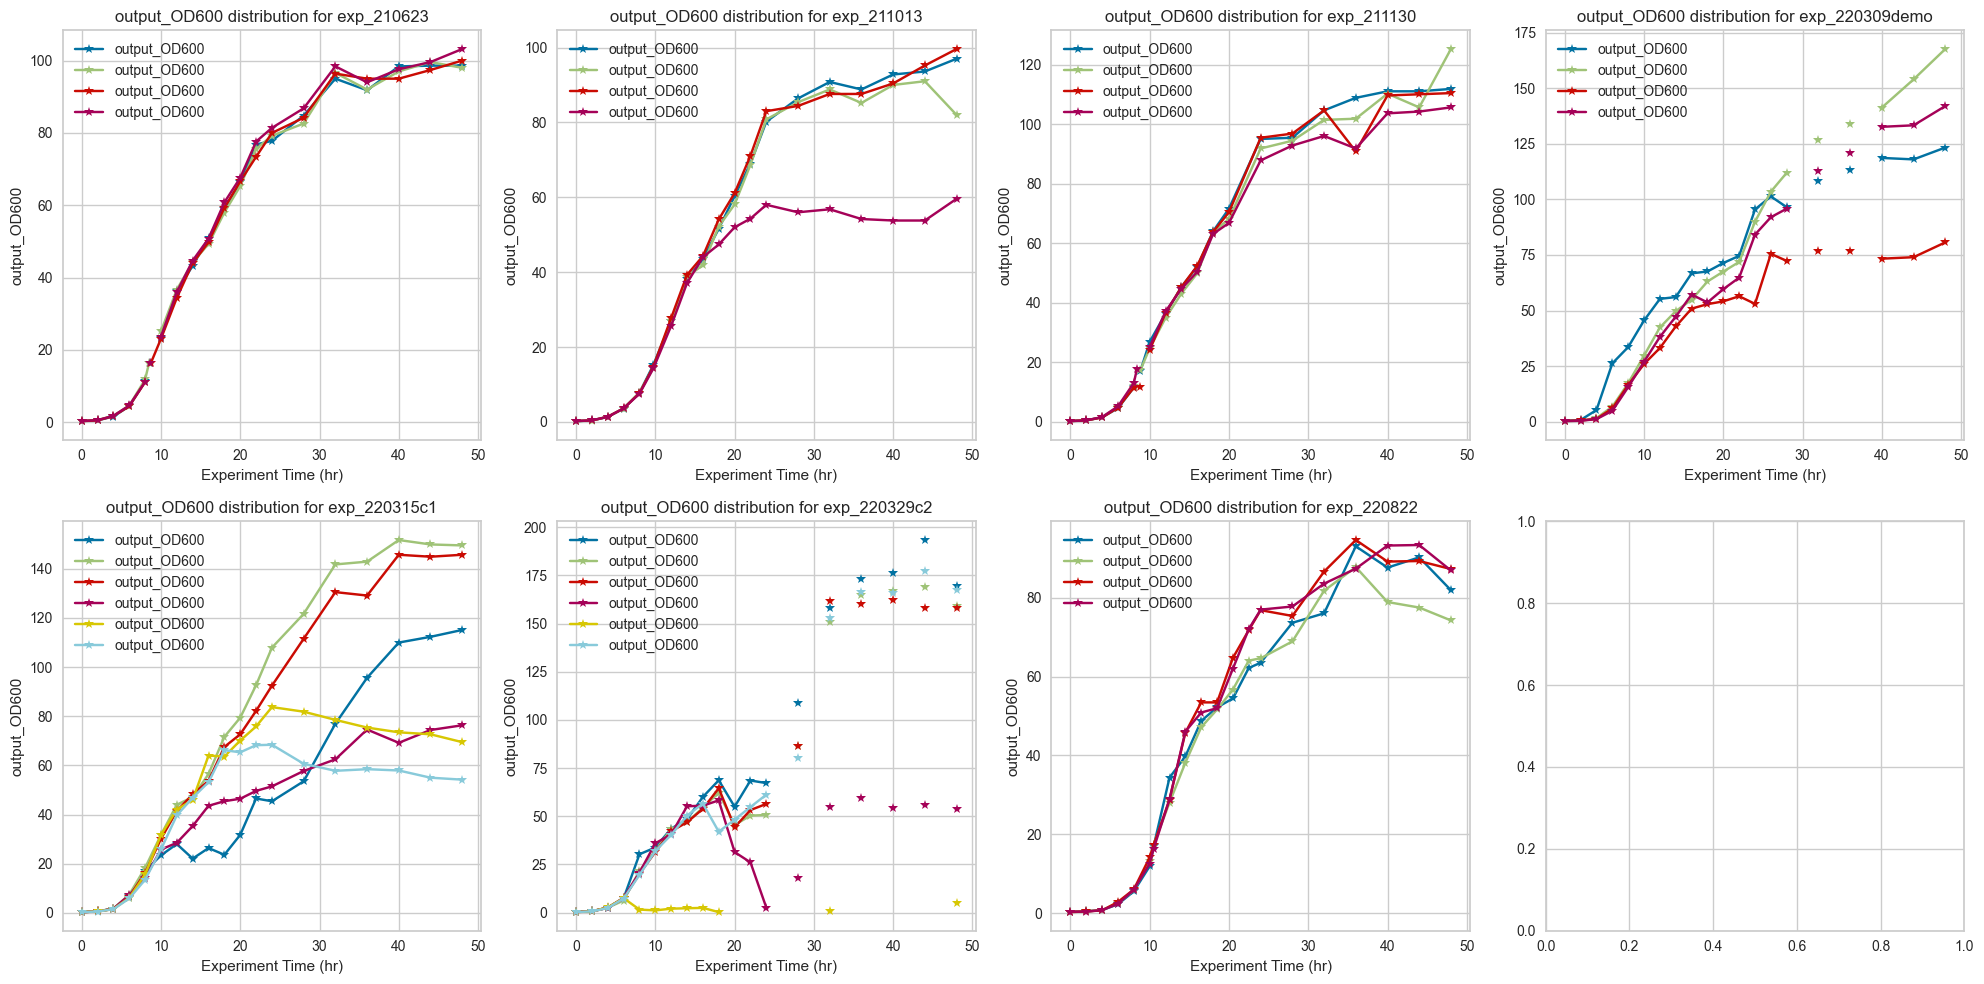

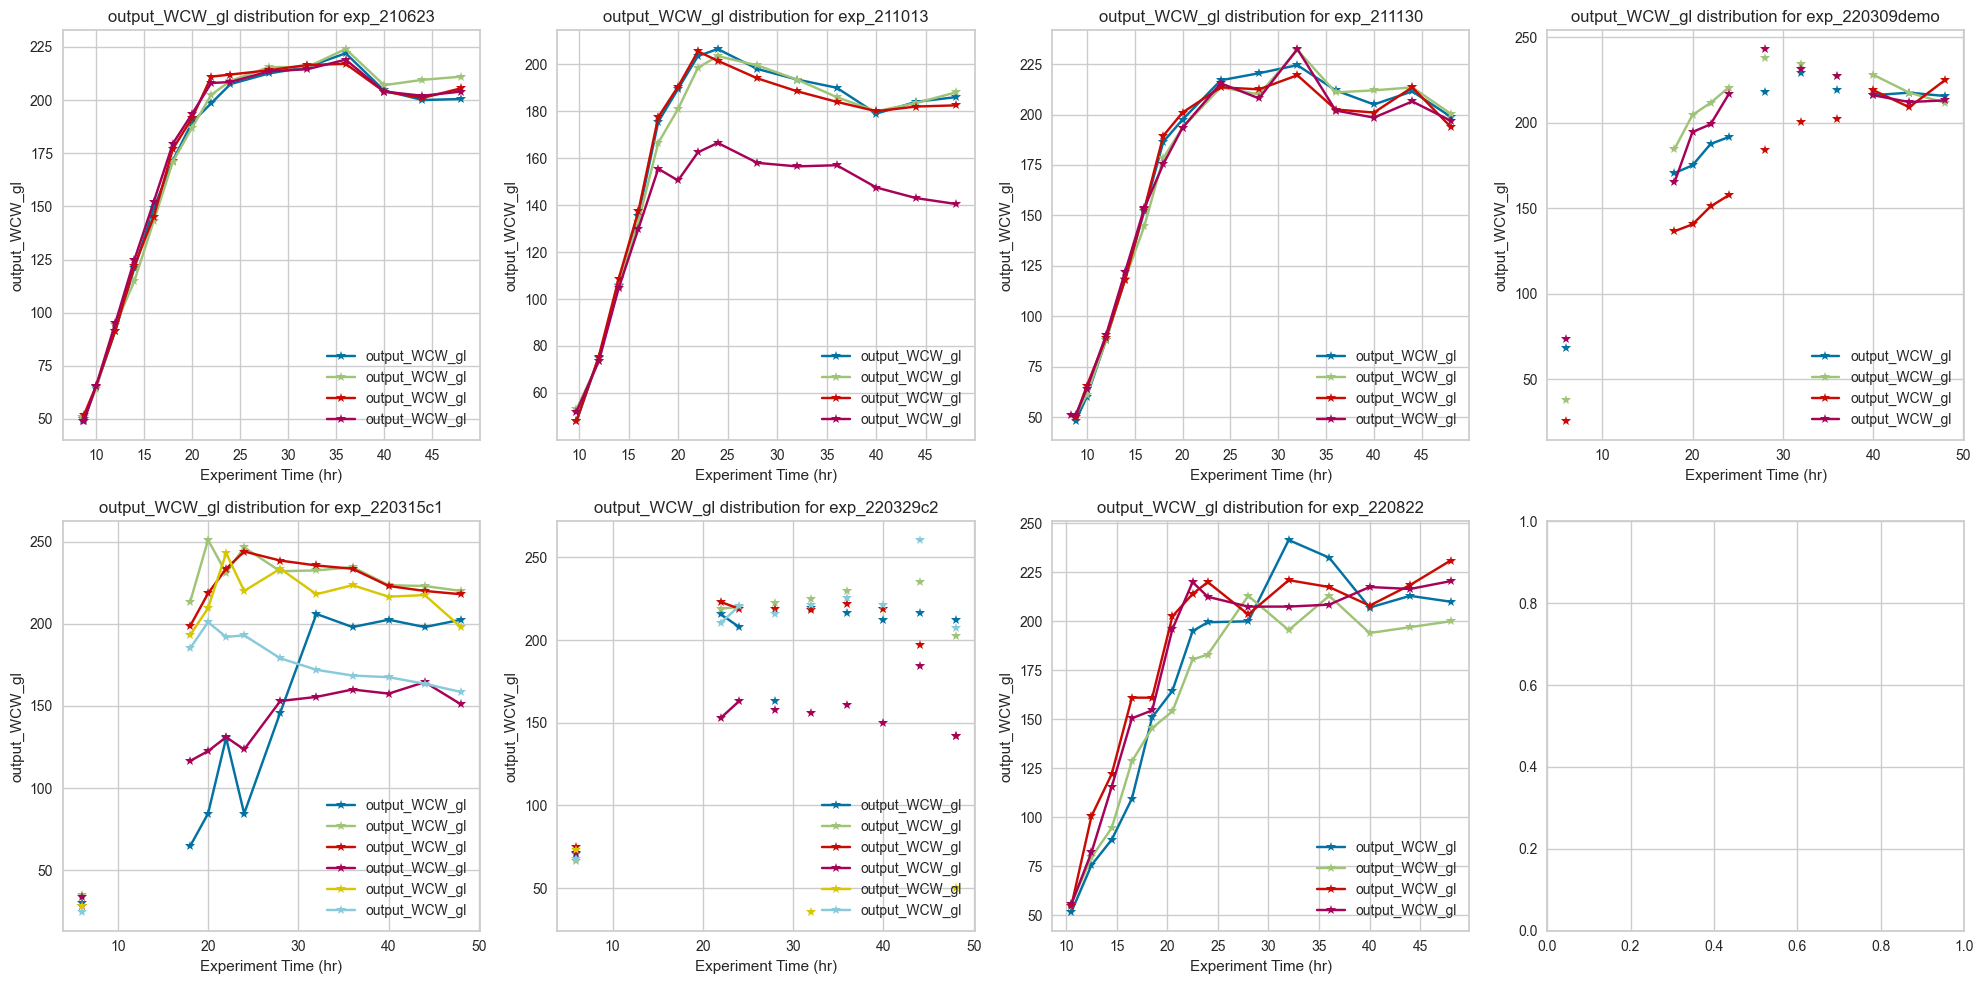

In [265]:
import matplotlib.pyplot as plt

# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['output_OD600', 'output_WCW_gl']

plot_timeseries(experiment_groups, output_columns)


> Nutrients Concentrations and its impact on Protein Production (OD600, WCW_gl)

In [ ]:
# output_glucose_gl (Glucose concentration): 
    # As a primary carbon source, glucose availability directly affects cell growth and energy metabolism. However, excessive glucose 
    # can lead to undesirable by-products like acetate in E. coli, which can inhibit growth and protein production.
    
# output_glycerol_gl (Glycerol concentration): 
    # Glycerol can be used as an alternative carbon source in some fermentation processes, influencing cell growth and protein expression 
    # differently than glucose.

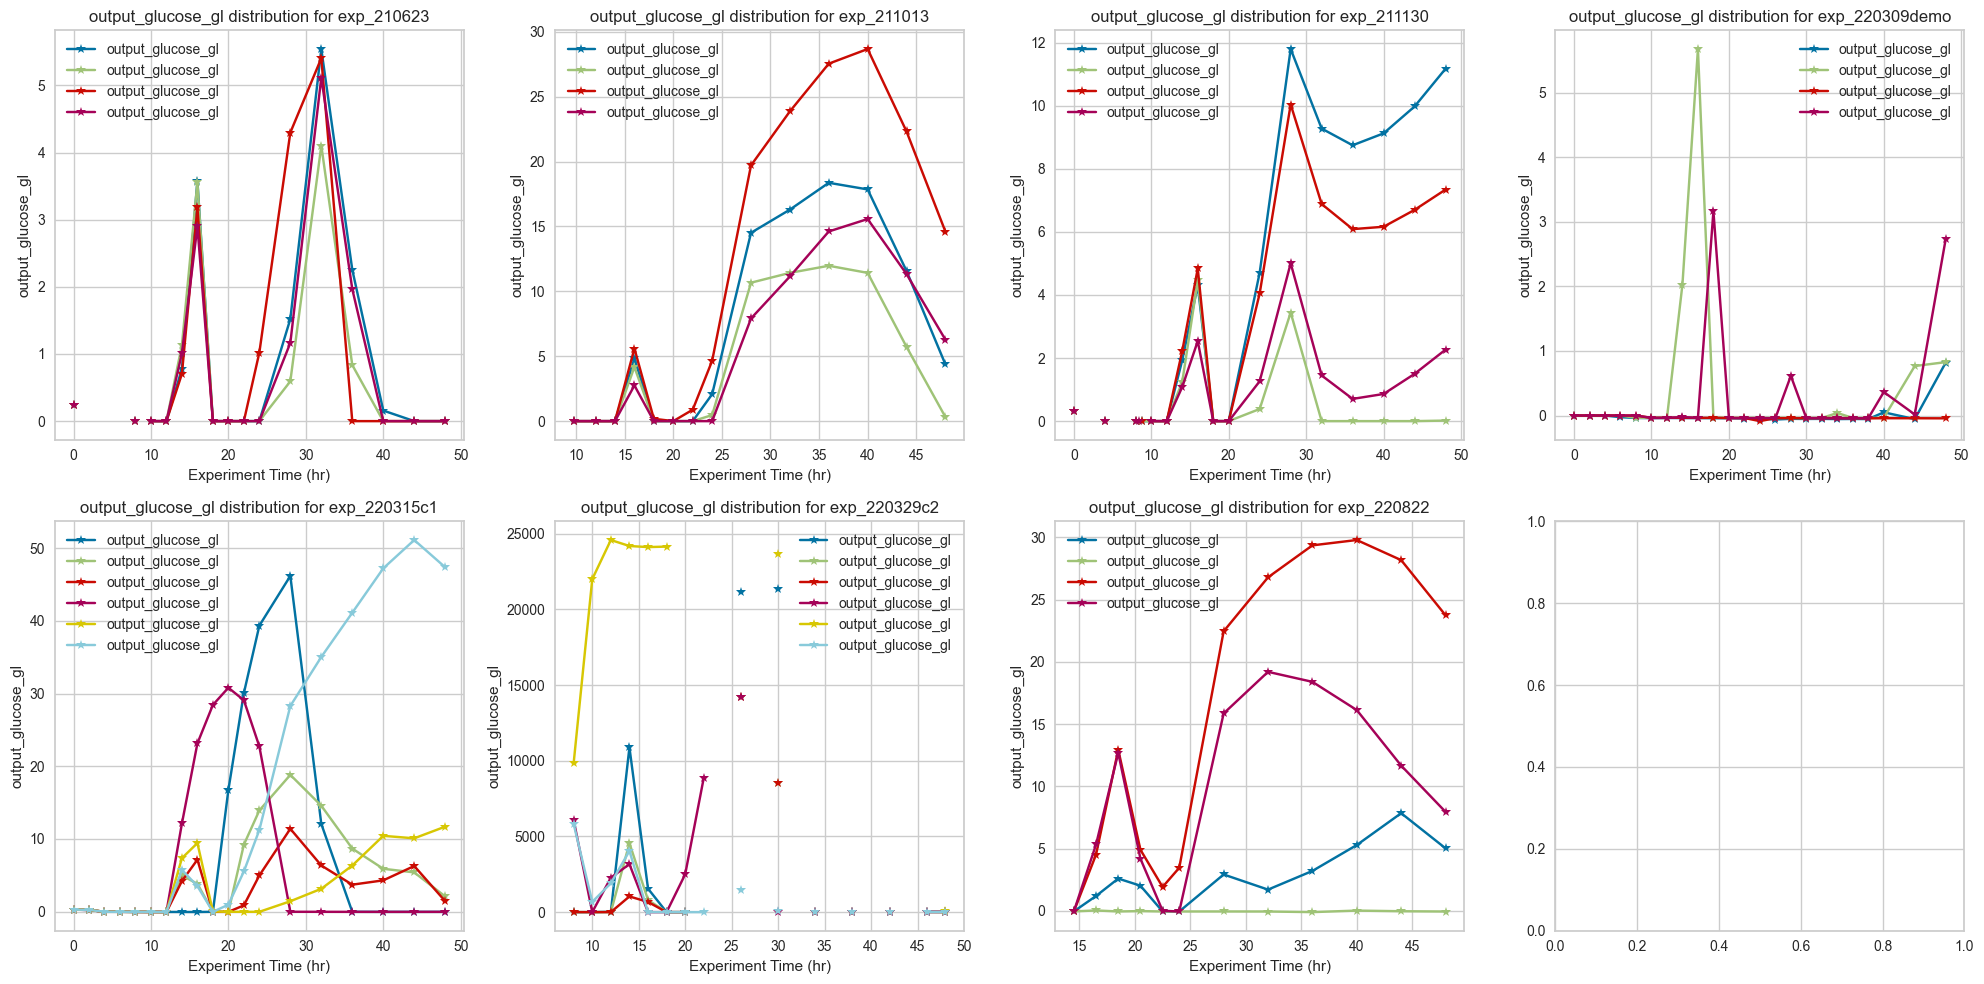

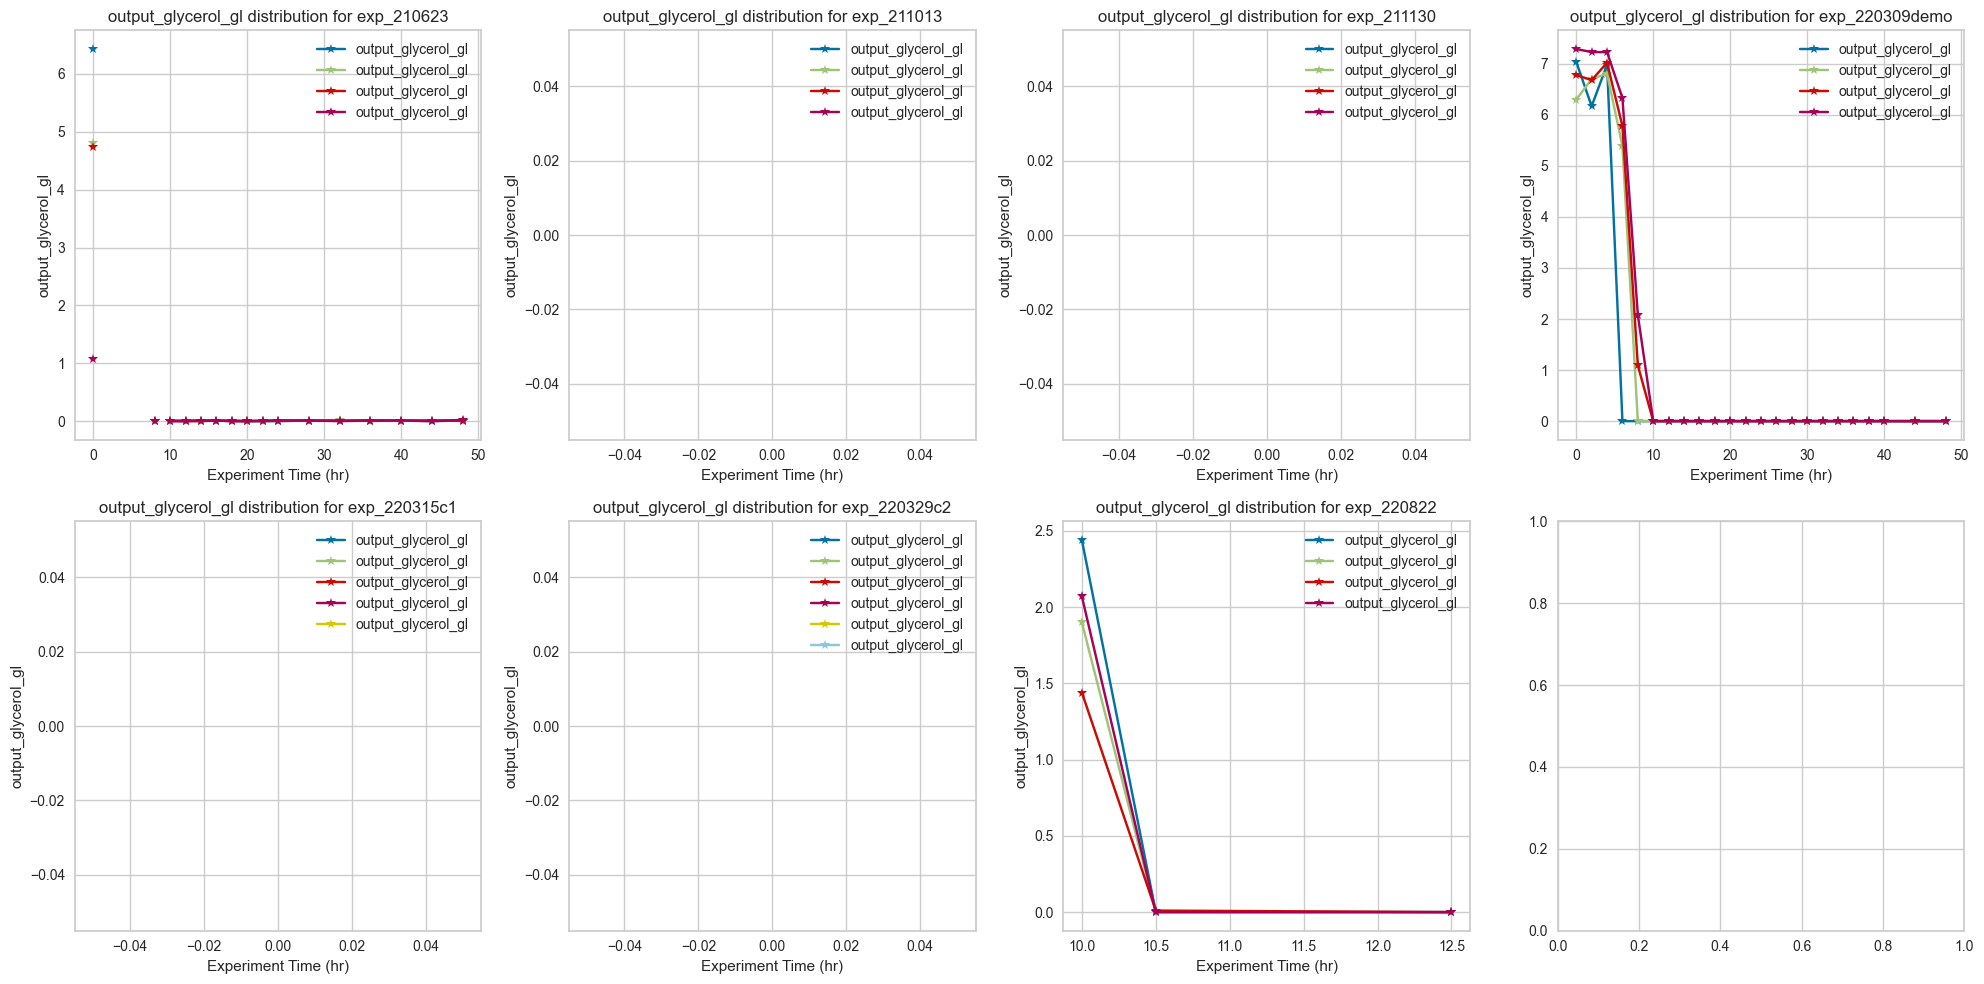

In [266]:
# Assuming 'experiments' is a list of lists containing your DataFrames, and each DataFrame has a 'name' attribute
output_columns = ['output_glucose_gl', 'output_glycerol_gl']

plot_timeseries(experiment_groups, output_columns)

>       Error in glucose concentration for exp_220329c2

> Environmental Conditions:

In [ ]:
# output_Temp (Temperature): 
    # Temperature profoundly influences cellular metabolism, protein folding, and the stability of the expressed protein. 
    # Optimal temperatures can enhance protein yield and functionality.
    
# output_Ph (pH): 
    # The pH of the culture medium affects enzyme activity, protein stability, and cell growth. Maintaining an optimal pH is crucial 
    # for maximizing protein production.
    
    # The pH scale is a numerical scale used to specify the acidity or basicity of an aqueous solution. It ranges from 0 to 14, 
    # with 7 being neutral. Solutions with a pH less than 7 are acidic, and those with a pH greater than 7 are basic (or alkaline).

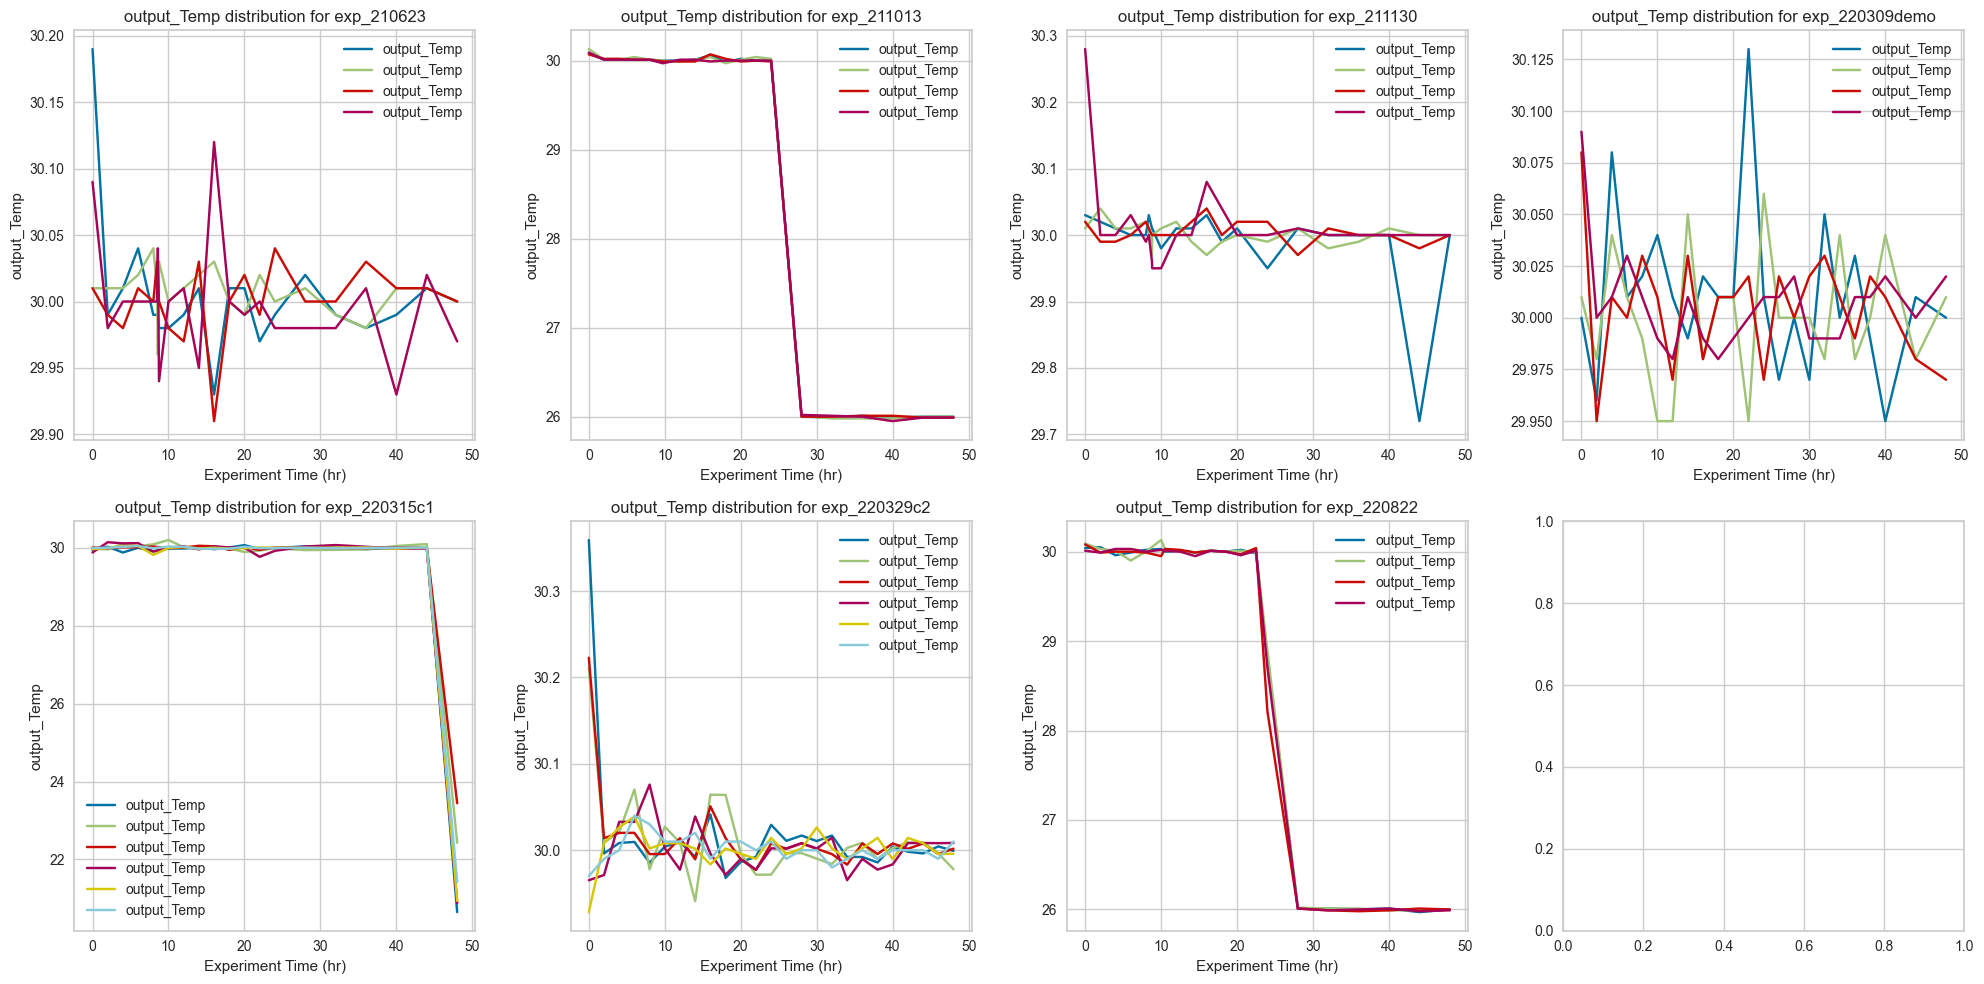

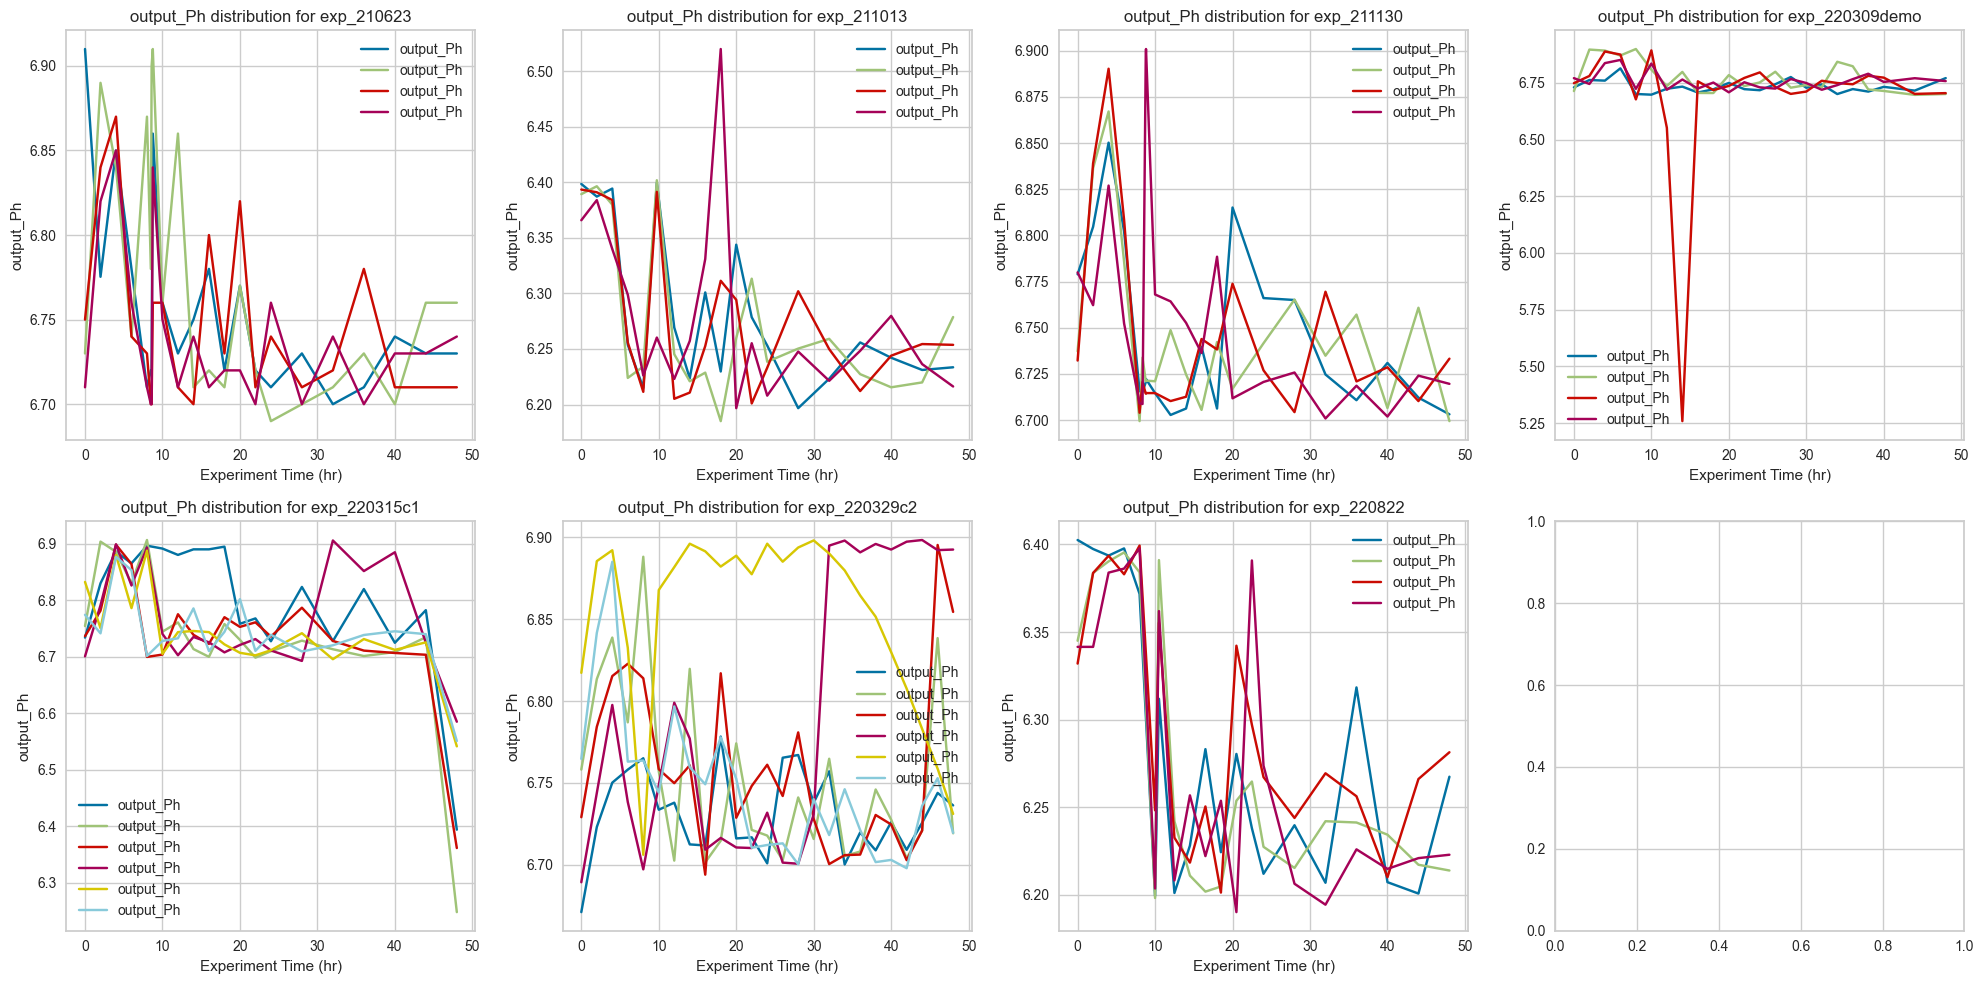

In [210]:
env_cols = ['output_Temp', 'output_Ph']

plot_timeseries(experiment_groups, env_cols)

> Nutrients

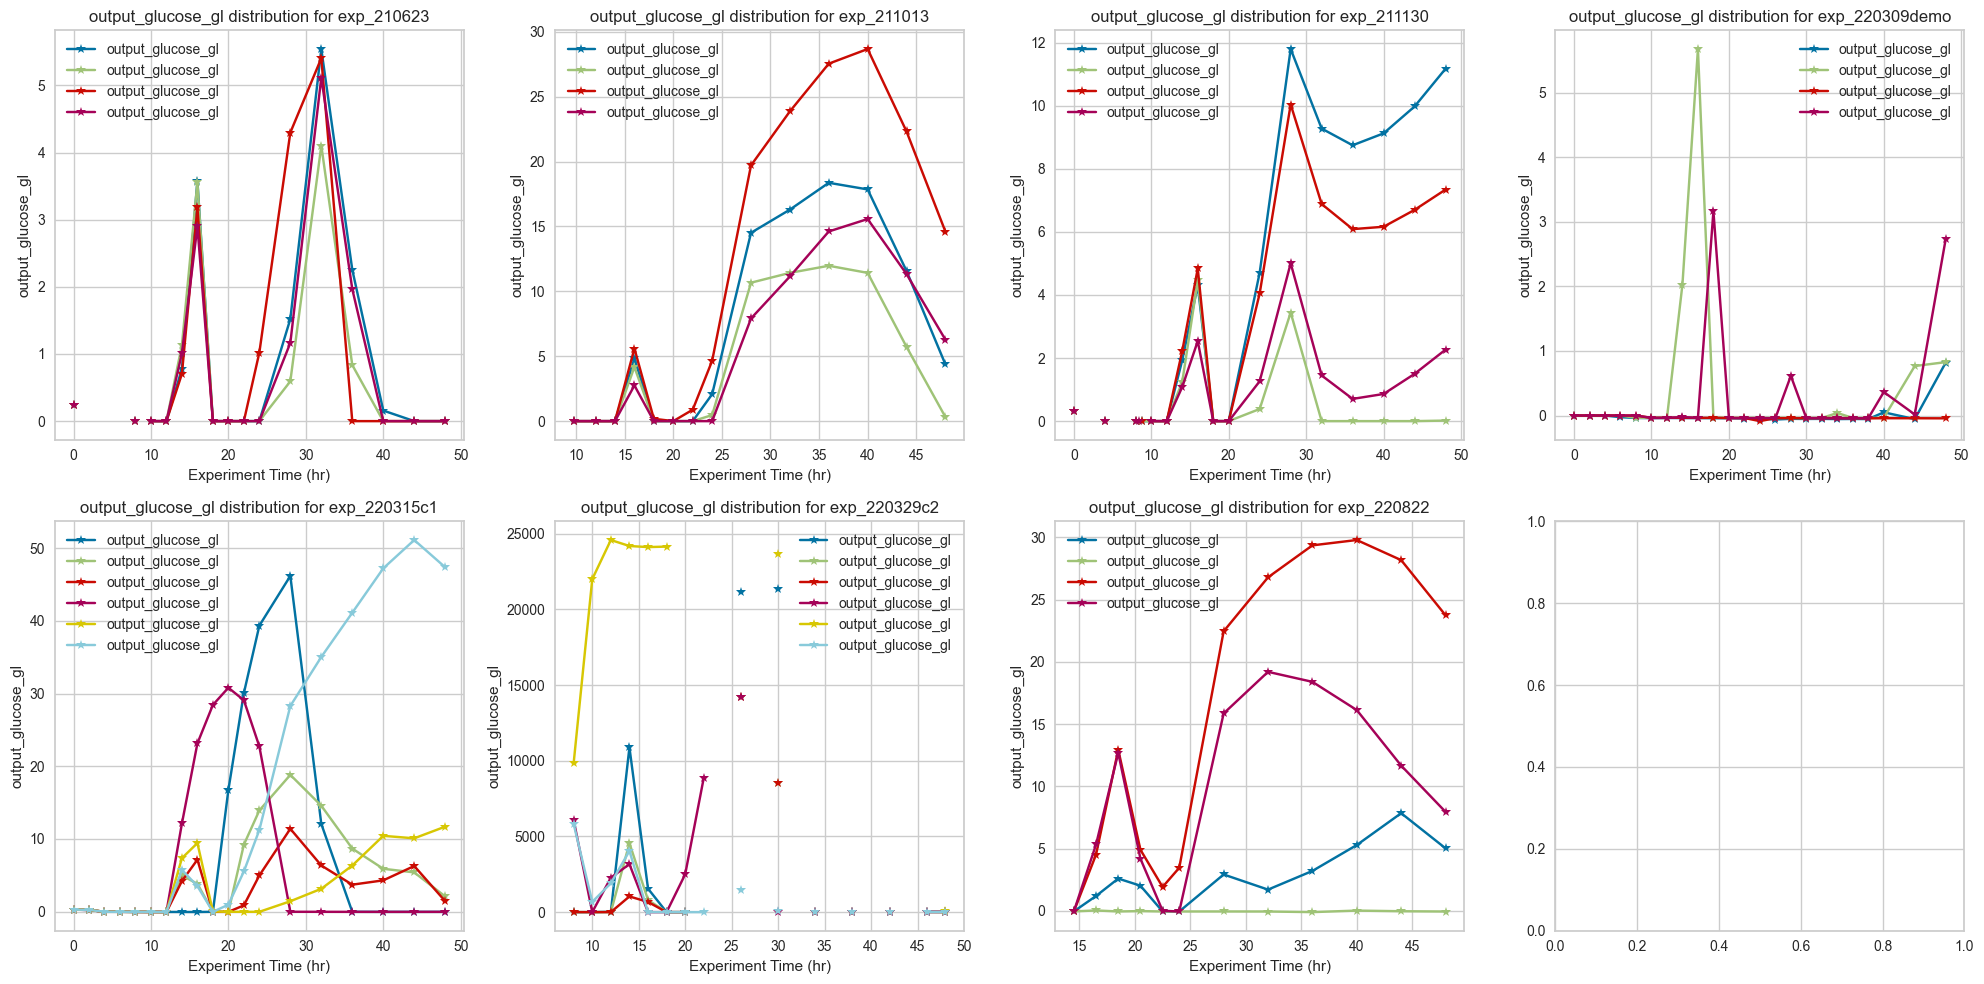

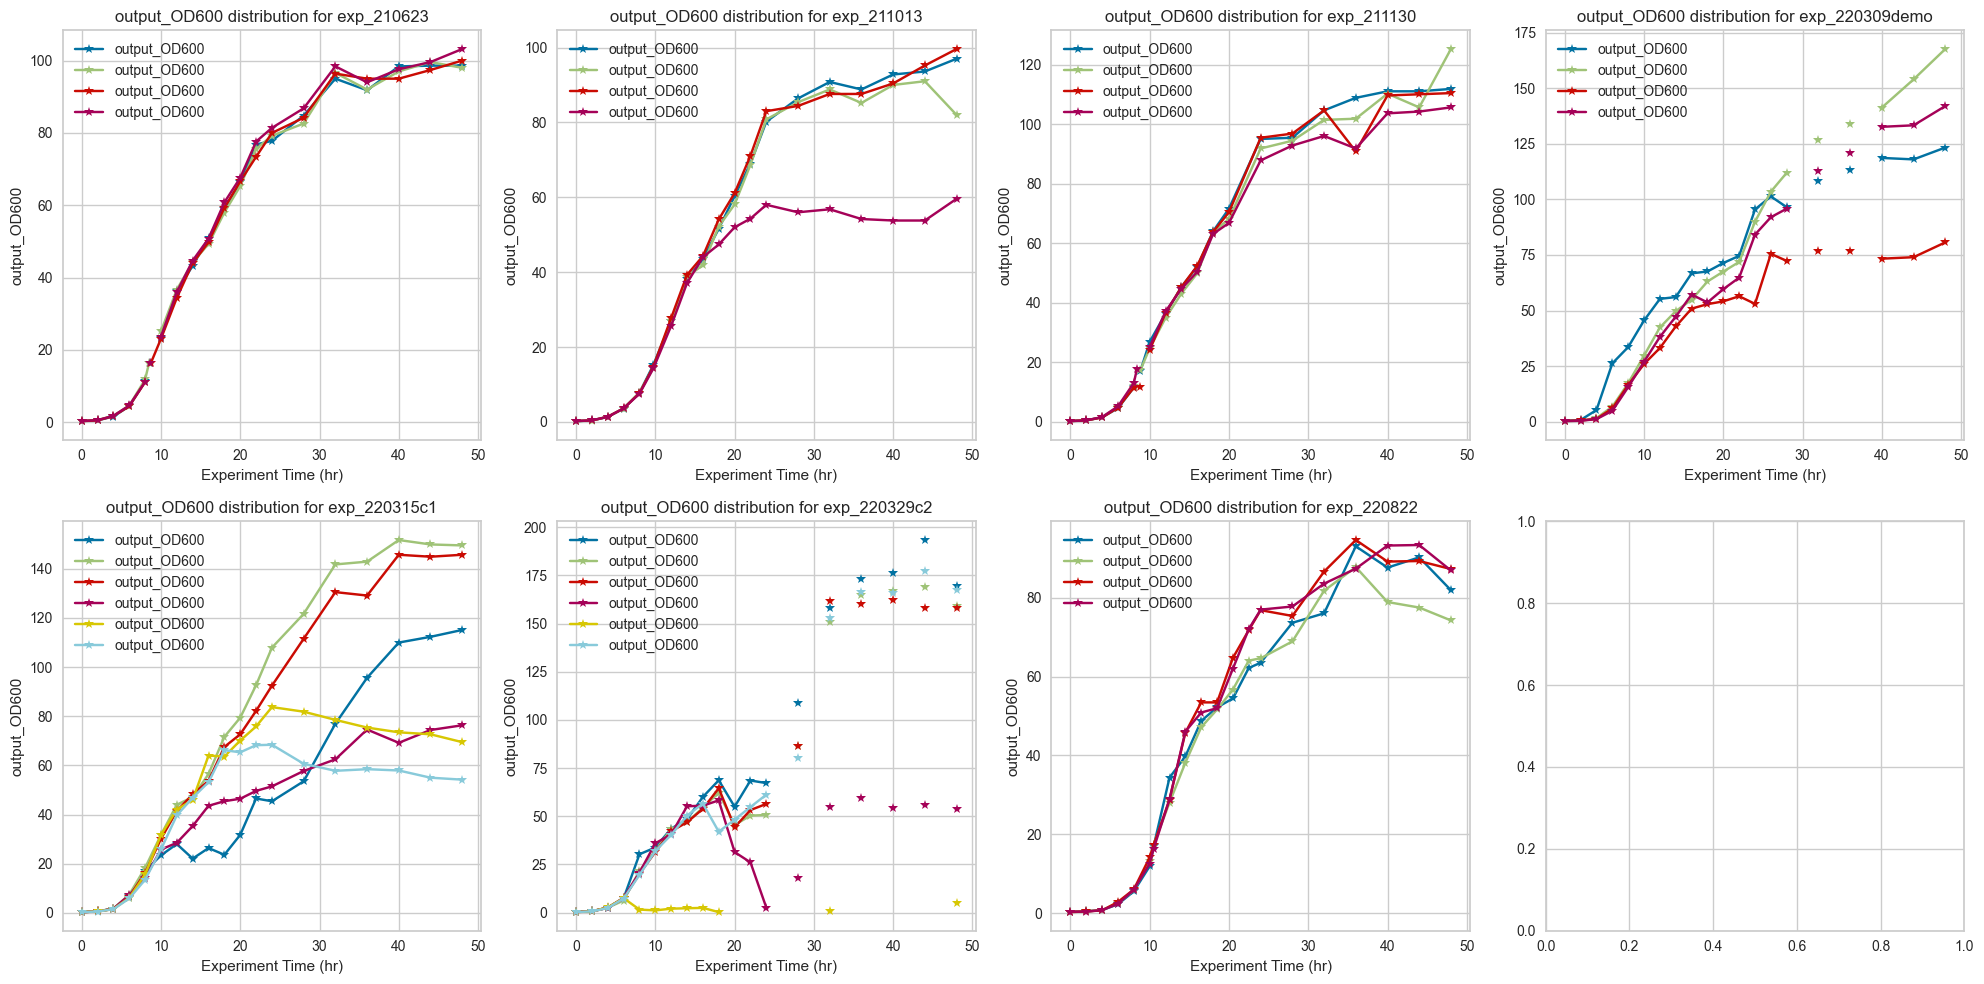

In [264]:
env_cols = ['output_glucose_gl', 'output_OD600']

plot_timeseries(experiment_groups, env_cols)

### Correlations and Associations:

>> Between Nutrient Levels and Cell Growth

In [ ]:
# Explore how variables like output_glucose_gl and output_glycerol_gl correlate with cell growth indicators such as 
# output_OD600 and output_WCW_gl. This can reveal how different carbon sources affect cell proliferation.

In [263]:
df_combined['output_glucose_gl'].describe()

count      522.000000
mean       599.979189
std       3189.067507
min         -0.091830
25%          0.000000
50%          0.000000
75%          6.835390
max      24582.000000
Name: output_glucose_gl, dtype: float64

In [268]:
df_combined

output_OD600  output_WCW_gl  output_agitation  output_air_%  output_D0_%  output_gasflow  output_O2  output_Ph  output_feed_%  output_feed  output_Temp output_glycerol_gl  output_glucose_gl output_acetate_mmol_l  output_phosphate_mmol_l
input_Timepoint (hr)                                                                                                                                                                                                                                              
0.0                       0.353000            NaN       1185.440000    100.000000    96.810000        5.010000   0.000000   6.910000           0.00      0.00000        30.19               6.43            0.24300                  1.95                    18.00
2.0                       0.547000            NaN       1185.320000    100.000000    97.950000        5.000000   0.000000   6.775341           0.00      0.00000        29.99                NaN                NaN                   NaN                      NaN
4.0                       1.590000            NaN       1185.220000    100.000000    94.600000        5.000000   0.000000   6.850000           0.00      0.00000        30.01                NaN                NaN                   NaN                      NaN
6.0                       4.460000            NaN       1184.830000    100.000000    82.450000        5.000000   0.000000   6.780000           0.00      0.00000        30.04                NaN                NaN                   NaN                      NaN
8.0                      11.320000            NaN       1184.500000    100.000000    66.110000        5.000000   0.000000   6.710000           0.00      0.00000        29.99                0.0            0.00000                 15.61                    14.47
...                            ...            ...               ...           ...          ...             ...        ...        ...            ...          ...          ...                ...                ...                   ...                      ...
32.0                     83.600000          207.5       1184.912964     99.576492    40.890980        4.793379   0.422386   6.194422          10.60      0.36040        25.99                NaN           19.20270                  4.02                    -0.01
36.0                     87.400000          208.5       1184.800049     99.456673    40.179340        4.711772   0.543087   6.226009           9.01      0.30634        26.00                NaN           18.39921                  2.78                    -0.02
40.0                     93.266667          217.5       1184.574951     99.654694    40.592091        4.850256   0.344494   6.214839           7.66      0.26044        26.01                NaN           16.13374                   4.1                    -0.03
44.0                     93.400000          216.5       1185.463989     99.543571    37.069462        4.800520   0.463291   6.221002           6.32      0.21488        25.98                NaN           11.67324                  4.84                    -0.11
48.0                     86.933333          220.5       1185.413940     99.595612    38.563911        4.996673   0.405830   6.222928           5.37      0.18258        25.99                NaN            7.95756                   4.1                    -0.09

[684 rows x 15 columns]

In [ ]:
# Notes: color code by experiment date, and marker by vessel type 


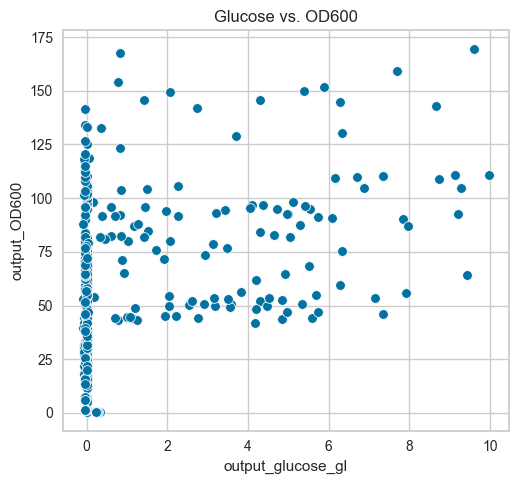

In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with your data
# df = pd.DataFrame(your_data)

# Scatter plot for Glucose vs. OD600
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.scatterplot(x='output_glucose_gl', y='output_OD600', data=df_combined.query('output_glucose_gl < 10'))
plt.title('Glucose vs. OD600')

# Scatter plot for Glycerol vs. OD600
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# sns.scatterplot(x='output_glycerol_gl', y='output_OD600', data=df_combined)
# plt.title('Glycerol vs. OD600')

plt.tight_layout()
plt.show()

# Repeat the process for WCW vs. nutrients if needed


In [ ]:
#  outlier in output_glucose_gl for exp_220329c2 

> Between Environmental Conditions and Protein Expression

In [ ]:
# Investigate how output_Temp and output_Ph relate to the overall protein production levels. Optimal environmental conditions can 
# significantly enhance protein yield.

> Between Oxygen Supply and Metabolic By-products

In [ ]:
# Analyze the relationship between aeration parameters (output_air_%, output_O2, output_gasflow) and the accumulation of by-products 
# like output_acetate_mmol_l, which can indicate metabolic shifts affecting protein production.

<a id="4"></a> <br>
## Data Pre-processing

<a id="4a"></a> <br>
### Data Cleaning

>> Basic formating (renaming cols, duplicates detection, datetime etc.)

In [ ]:
# Remove duplicates 
df.drop_duplicates(inplace=True) 

#formating columns 
df.



# Rename columns
df.rename(columns={'price': 'selling_price', 'bedrooms': 'num_bedrooms'}, inplace=True)

#replace non numeric columns
def replace_non_numeric(df: pd.DataFrame, columns):
    """
    Replaces non-numeric values in the specified columns of a Pandas dataframe with NaN.

    Parameters:
        df (pd.DataFrame): The dataframe to process.
        columns (list): A list of column names to replace non-numeric values in.

    Returns:
        pd.DataFrame: The updated dataframe with non-numeric values replaced by NaN.
    """
    for col in columns:
        df.dropna(subset = col, inplace= True)
        if df[col].dtype == 'object' or df[col].dtype == 'float':
            # df.dropna(subset = col, inplace= True)
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df.dropna(subset = col, inplace= True)
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            df.dropna(subset = col, inplace= True)
    return df

>> format datetime

In [ ]:
def convert_timestamp(ts):
    """
    Converts a Unix timestamp to a formatted date and time string.

    Args:
        ts (int): The Unix timestamp to convert.

    Returns:
        str: A formatted date and time string in the format 'YYYY-MM-DD HH:MM:SS'.
    """
    utc_datetime = datetime.datetime.utcfromtimestamp(ts)
    formatted_datetime = utc_datetime.strftime('%Y-%m-%d %H:%M:%S')
    formatted_datetime = pd.to_datetime(formatted_datetime, infer_datetime_format=True) 
    return formatted_datetime

convert_timestamp(ts) 

>> Remove unwanted Data

In [ ]:
# Remove irrelevant columns
df.drop(['id', 'date'], axis=1, inplace=True) 

>> Handling Missing values

In [ ]:
def missing_value_analysis(df):
    '''
    Function to do basic missing value analysis
    Required Input - 
        - df = Pandas DataFrame
    Expected Output -
        - Chart of Missing value co-occurance
        - Chart of Missing value heatmap
    '''
    msno.matrix(df)
    msno.heatmap(df)

def view_NaN(df):
    """
    Prints the name of any column in a Pandas DataFrame that contains NaN values.

    Parameters:
        - df: Pandas DataFrame

    Returns:
        - None
    """
    for col in df.columns:
        if df[col].isnull().any() == True: 
            print(f"there is {df[col].isnull().sum()} NaN present in column:", col)
        else:
            print("No NaN present in column:", col)  

missing_value_analysis (df)
view_NaN(df) 


# np.argwhere(df.isnull().values)   #to find the index with missing values

In [ ]:
# Replace missing values 
# df.fillna(df.mean(), inplace=True) 

def treat_missing_numeric(df,columns,how = 'mean', value = None):
    '''
    Function to treat missing values in numeric columns
    Required Input - 
        - df = Pandas DataFrame
        - columns = List input of all the columns need to be imputed
        - how = valid values are 'mean', 'mode', 'median','ffill', numeric value
    Expected Output -
        - Pandas dataframe with imputed missing value in mentioned columns
    '''
    if how == 'mean':
        for i in columns:
            print("Filling missing values with mean for columns - {0}".format(i))
            df[i] = df[i].fillna(df[i].mean())
            
    elif how == 'mode':
        for i in columns:
            print("Filling missing values with mode for columns - {0}".format(i))
            df[i] = df[i].fillna(df[i].mode())
    
    elif how == 'median':
        for i in columns:
            print("Filling missing values with median for columns - {0}".format(i))
            df[i] = df[i].fillna(df[i].median())
    
    elif how == 'ffill':
        for i in columns:
            print("Filling missing values with forward fill for columns - {0}".format(i))
            df[i] = df[i].fillna(method ='ffill')
    
    elif how == 'digit':
        for i in columns:
            print("Filling missing values with {0} for columns - {1}".format(how, i))
            df[i] = df[i].fillna(str(value)) 
      
    else:
        print("Missing value fill cannot be completed")
    return df


treat_missing_numeric(smart_home, ["cloudCover"], how="digit", value = 0.1) 

In [ ]:
#using Sklearn to handle missing values - (SimpleImputer, KNN-Imputer, Iterative Imputer, )


#IterativeImputer: This function estimates missing values using a predictive model.
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor 

def impute_missing_values_iteratively(X): #or (X, Columns)
    imputer = IterativeImputer(estimator = RandomForestRegressor())
        
    # select only the columns with missing values to be imputed
    # X_cols = X[columns]
    X_imputed = imputer.fit_transform(X) #or X_cols
    return X_imputed

impute_missing_values_iteratively(df) 

>> Outliers

In [ ]:
#visualize outliers
def visualize_outlier (df: pd.DataFrame):
    # Select only numeric columns
    numeric_cols = df.select_dtypes(include=["float64", "int64"])
    # Set figure size and create boxplot
    fig, ax = plt.subplots(figsize=(12, 6))
    numeric_cols.boxplot(ax=ax, rot=90)
    # Set x-axis label
    ax.set_xlabel("Numeric Columns")
    # Adjust subplot spacing to prevent x-axis labels from being cut off
    plt.subplots_adjust(bottom=0.4) 
    # Increase the size of the plot
    fig.set_size_inches(10, 6)
    # Show the plot
    plt.show()

visualize_outlier (df) 

In [ ]:
#Visualizing Regression outliers using Cook's distance
from yellowbrick.regressor import CooksDistance


# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show() 

In [ ]:
#Perform Data Distribution of relevant columns before determining whether or not they should be classified as outliers


# Plotting the data distribution
plt.figure(figsize=(8, 6))
plt.hist(df['max_power_bhp'], bins=20, color='blue')
plt.xlabel('Max Power (bhp)')
plt.ylabel('Frequency')
plt.title('Data Distribution - Max Power (bhp)')
plt.show()


In [ ]:
def outlier_detect_arbitrary(data,col,upper_fence,lower_fence):
    '''
    identify outliers based on arbitrary boundaries passed to the function.
    '''

    para = (upper_fence, lower_fence)
    tmp = pd.concat([data[col]>upper_fence,data[col]<lower_fence],axis=1)
    outlier_index = tmp.any(axis=1)
    print('Num of outlier detected:',outlier_index.value_counts()[1])
    print('Proportion of outlier detected',outlier_index.value_counts()[1]/len(outlier_index))    
    return outlier_index, para 

In [ ]:
#to handle outliers, use any of Tukey's test, Kernel density estimation, Z-score method, Mahalanobis distance method,
#Isolation Forest model, EllipticEnvelope.


# Tukey's test: This statistical method identifies outliers as values more than a certain number of standard deviations 
#     away from the median and works well for univariate datasets with normal distributions.

# Kernel density estimation: This non-parametric method estimates the probability density function of a dataset 
#     and identifies outliers as values with low probability density, making it suitable for non-normal datasets.

# Z-score method: This simple method identifies outliers as values more than a certain number of standard deviations 
#     away from the mean and is widely used for datasets with normal distributions.

# Mahalanobis distance method: This multivariate method identifies outliers based on the distance of each point from the 
#     centroid of the dataset and is effective for datasets with multivariate normal distributions.

# Isolation Forest model: This machine learning algorithm identifies outliers by isolating them into a separate tree 
#     structure, making it suitable for high-dimensional feature spaces with both linear and non-linear relationships 
#     between features.

# EllipticEnvelope: This multivariate method identifies outliers by fitting an ellipse to the data and identifying 
#     points that are outside the ellipse, making it effective for datasets with multivariate normal distributions.

<a id="4b"></a> <br>
### Data Transformation (scaling, encoding categorical data)

>> Extracting features from Dates, Mixed Variables etc.

In [ ]:
df_hour = df.resample('H').mean() 
df_day = df.resample('D').mean() 
df_month = df.resample('M').mean() 
df_year = df.resample('Y').mean()


df['hour'] = df.index.hour 
df['day'] = df.index.day 
df['weekday'] = df.index.day_name() 
df['month'] = df.index.month 
df['year'] = df.index.year 

>> Categorical Variable Encoding (data transformation)

In [ ]:
# Label Encoding: replaces each category with a numerical label. This technique is suitable for data 
#     where the categories have an intrinsic order, such as "low," "medium," and "high." Works well with linear models

# Ordinal encoding: assigns a numerical value to each category based on their frequency. This technique is suitable 
#     for data where the categories do not have an intrinsic order, but where their frequency may be informative.
#     Suitable for non-linear models

# One-hot encoding: creates a binary variable for each category, indicating its presence or absence. 
#     This technique is suitable for data where the categories do not have an intrinsic order and the 
#     number of categories is small



>> Data Spliting 

In [ ]:
def split_data(dataset, test_size=0.2, val_size=0.2):
    """
    Split a dataset into training, validation, and test sets.

    Parameters
    ----------
    dataset : array-like of shape (n_samples, n_features)
        The input dataset.
    test_size : float, optional
        The proportion of the dataset to include in the test set.
    val_size : float, optional
        The proportion of the dataset to include in the validation set.

    Returns
    -------
    X_train : array-like of shape (n_train_samples, n_features)
        The training input samples.
    X_val : array-like of shape (n_val_samples, n_features)
        The validation input samples.
    X_test : array-like of shape (n_test_samples, n_features)
        The test input samples.
    y_train : array-like of shape (n_train_samples,)
        The target values (class labels) for the training input samples.
    y_val : array-like of shape (n_val_samples,)
        The target values (class labels) for the validation input samples.
    y_test : array-like of shape (n_test_samples,)
        The target values (class labels) for the test input samples.
    """
    #reset index
    df = df.reset_index()
    
    # Split the dataset into train and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=test_size, random_state=42)

    # Split the train set into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=val_size/(1-test_size), random_state=42)

    #show the shapes
    print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


# Split the dataset into training, validation, and test sets
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df) 


In [ ]:
# from sklearn.preprocessing import MinMaxScaler 
# # Set up the scaler
# scaler = MinMaxScaler()

# # Fit the scaler to the training set
# scaler.fit(X_train) 

# # Transform the training and testing sets
# X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val) 
# X_test = scaler.transform(X_test)


>> Feature Scaling (data transformation) - apply to train, and then to test

In [ ]:
#if scaling only select features

# columns_to_transform = ['year', 'km_driven', 'engine_CC', 'torque_Nm', 
#                         'seats', 'rpm', 'max_power_bhp', 'mileage_kmpl', 'vehicle_brand_target_encoded', 
#                         'vehicle_model_target_encoded']

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler on the selected columns
# scaler.fit(X_train[columns_to_transform])

# def scale_and_concat(df, scaler, columns_to_transform):
#     """
#     Scales selected columns in a DataFrame using StandardScaler and concatenates them with the rest of the DataFrame.

#     Args:
#         df (pandas.DataFrame): The DataFrame containing the data.
#         columns_to_transform (list): List of column names to be scaled.

#     Returns:
#         pandas.DataFrame: The concatenated DataFrame with scaled columns.
#     """
#     # Create a copy of the original DataFrame
#     df_concatenated = df.copy()

#     # Scale the selected columns
#     scaled_columns = scaler.transform(df[columns_to_transform])

#     # Create a DataFrame with the scaled columns
#     df_scaled = pd.DataFrame(scaled_columns, columns=columns_to_transform, index=df.index)

#     # Concatenate the scaled columns with the rest of the DataFrame
#     df_concatenated = pd.concat([df_concatenated.drop(columns=columns_to_transform, axis = 1), df_scaled], axis=1)

#     return df_concatenated 


# X_train = scale_and_concat(X_train, scaler, columns_to_transform)
# X_val = scale_and_concat(X_val, scaler, columns_to_transform) 
# X_test = scale_and_concat(X_test, scaler, columns_to_transform)

In [ ]:
#the decision to scale or transform a variable should be based on 
    # its distribution, 
    # relationship with the target variable, and
    # domain knowledge. 
# Scaling is not necessary if the variable follows a normal or approximately normal distribution; or if the variable has a linear 
# relationship with the target variable

# Normalization - MinMax() - rescaling the values into a range of [0,1]. This process can be particularly useful when your features have 
# different scales and you want to standardize them without affecting the shape of the distributio

# standardization - StandardScaler() - shifting the distribution of each attribute to have a mean of zero and a standard deviation of one 
# (unit variance). It is useful in cases where the data follows a Gaussian distribution


#if scaling all the features 
def standardize_data(X_train, X_val, X_test): 
    """
    Standardizes the training and testing data using the mean and standard deviation
    learned from the training set.
    
    Args:
    - X_train: numpy array or pandas dataframe, training data
    - X_test: numpy array or pandas dataframe, testing data
    
    Returns:
    - X_train_scaled: numpy array or pandas dataframe, standardized training data
    - X_test_scaled: numpy array or pandas dataframe, standardized testing data
    """
    from sklearn.preprocessing import StandardScaler 
    # Set up the scaler
    scaler = StandardScaler()
    
    # Fit the scaler to the training set
    scaler.fit(X_train) 
    
    # Transform the training and testing sets
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    return scaler, X_train_scaled, X_val_scaled, X_test_scaled


from typing import List 
def to_DataFrame(Dataset, columns:List) -> DataFrame: 
    df = pd.DataFrame(Dataset, columns=columns)
    return df 


scaler, X_train, X_val, X_test = standardize_data(X_test, X_test) 
X_train = to_DataFrame(X_train, columns= continuous_feature)
X_val = to_DataFrame(X_val, columns= continuous_feature)
X_test = to_DataFrame(X_test, columns= continuous_feature) 

>> Variable Transformation - apply to train, and then to test

In [ ]:
#the decision to scale or transform a variable should be based on its distribution, relationship with the 
# target variable, and domain knowledge. Scaling is not necessary if the variable follows a normal or approximately 
# normal distribution

In [ ]:
#Variable transformation involves transforming the values of variables to make them more suitable for analysis
#the idea is to make the variables normally/gaussian distributed. Hence, 

#first step is to assess normality using a histogram or QQ-plot (to explore the variable distribution)

def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    # check for skewness
    skewness = df[variable].skew()
    if skewness > 0:
        skew_type = "positively skewed"
    elif skewness < 0:
        skew_type = "negatively skewed"
    else:
        skew_type = "approximately symmetric"
        
    # print message indicating skewness type
    print(f"The variable {variable} is {skew_type} (skewness = {skewness:.2f})")
    
    plt.show()

# # Check function output
# diagnostic_plots(X, "MedInc")


#use this to make diagnostics plot for all variables
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt) 
    plt.show()

In [ ]:
def qq_plots(df, variable):     
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [ ]:
#If the variables are NOT normally distributed, we then transform it. It is necessary to test several variable 
# transformation methods, and choose the best for that feature. One variable transformation method is log_transform

#NB: if data is positively skewed (right skewed), use (logarithmic, reciprocal, or square root transformation)
    #if data is negatively skewed (left skewed), use (Box-Cox or Yeo-Johnson transformations)
#log transform 
def log_transform(df, columns):
    """
    Transforms specified columns of a pandas DataFrame using the natural logarithm function.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame to transform.
    columns : list
        A list of column names to transform.

    Returns:
    --------
    pandas DataFrame
        The transformed DataFrame.
    """
    transformer = FunctionTransformer(np.log1p, validate=True)
    X = df.values.copy()
    X[:, df.columns.isin(columns)] = transformer.transform(X[:, df.columns.isin(columns)])
    X_log = pd.DataFrame(X, index=df.index, columns=df.columns)
    return X_log

#perform transformation on the variables that are not normally distributed
X_train = log_transform(X_train, columns = ['Vp', 'Caliper'])
X_val = log_transform(X_val, columns = ['Vp', 'Caliper'])
X_test = log_transform(X_test, columns = ['Vp', 'Caliper']) 

In [ ]:
diagnostic_plots(df_log, columns) 

<a id="4d"></a> <br>
### Data Reduction

In [ ]:
# This step involves reducing the dimensionality of the data by selecting a subset of the original features or 
# by transforming the data using techniques like Principal Component Analysis (PCA).

#Feature selection
    # Removing features with low variance (VarianceThreshold)
    # Univariate Feature Selection (SelectKBest, SelectPercentile, GenericUnivariateSelect)
    # Recursive Feature Elimination (RFE, RFECV)        RFECV - RFE cross validation
    # Feature selection using SelectFromModel (SelectFromModel) - use L1-based (Lasso, Ridge, ElasticNet) or Tree-based
    # Sequential Feature Selection (SequentialFeatureSelector) - SFS can be either forward or backward


#Feature extraction
    # Principal Component Analysis (PCA)
    # Independent Component Analysis (ICA)
    # t-Distributed Stochastic Neighbor Embedding (t-SNE)

<a id="5"></a> <br>
## Selecting and Training the Model 

In [ ]:
# Before you choose a ML technique to train the model, consider if your ML technique is resistant to the following:
#     Missing data
#     Data imbalance
#     Feature Scaling
#     Categorical Data
#     Outliers
#     Dimensionality (refers to the number of features or variables in the dataset)

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Parameters
n_time_steps = 100  # Number of time steps in each dataset
n_features = 5  # Number of features or variables in each dataset
n_samples = 3  # Number of time series datasets

# Simulate time series data for each experiment
datasets = [np.random.rand(n_time_steps, n_features) for _ in range(n_samples)]

# Simulate a target variable for each dataset (for simplicity, a linear combination of features)
targets = [dataset.dot(np.random.rand(n_features)) + np.random.rand(n_time_steps) for dataset in datasets]


stacked_datasets = np.stack(datasets, axis=0)
stacked_targets = np.stack(targets, axis=0)


In [14]:
models = []  # To store the trained models
scores = []  # To store the evaluation scores (Mean Squared Error)

for i, (dataset, target) in enumerate(zip(stacked_datasets, stacked_targets)):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)
    
    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    scores.append(mse)
    
    # Store the model
    models.append(model)
    
    print(f"Model {i+1}: Mean Squared Error = {mse:.4f}")


Model 1: Mean Squared Error = 0.1175
Model 2: Mean Squared Error = 0.0902
Model 3: Mean Squared Error = 0.0924


> Cross training

In [ ]:
for model_idx, model in enumerate(models):
    print(f"\nTraining model {model_idx+1} on all datasets...")
    for dataset_idx, (dataset, target) in enumerate(zip(stacked_datasets, stacked_targets)):
        if model_idx != dataset_idx:  # Skip the dataset the model was originally trained on
            # Split the dataset
            X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)
            
            # Train the model on this new dataset
            model.fit(X_train, y_train)
            
            # Evaluate the model
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            print(f"Model {model_idx+1} on Dataset {dataset_idx+1}: MSE = {mse:.4f}")


other methods:
    cross-training
    incremental training
    Ensemble Learning
    Cross-validation across Datasets
    

>> Then select the preferred model to use

In [ ]:
# Train a random forest classifier on the dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# # Generate a synthetic dataset with 1000 samples, 20 features, and 2 classes
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, weights=[1,1], random_state=1)

### Running Random Forest
def runRF(
    train_X,
    train_y,
    test_X,
    test_y=None,
    test_X2=None,
    rounds=100,
    depth=20,
    leaf=10,
    feat=0.2,
    min_data_split_val=2,
    seed_val=0,
    job=-1,
):
    model = RandomForestClassifier(
        n_estimators=rounds,
        max_depth=depth,
        min_samples_split=min_data_split_val,
        min_samples_leaf=leaf,
        max_features=feat,
        n_jobs=job,
        random_state=seed_val,
    )
    model.fit(train_X, train_y)
    train_preds = model.predict_proba(train_X)[:, 1]
    test_preds = model.predict_proba(test_X)[:, 1]

    test_preds2 = 0
    if test_X2 is not None:
        test_preds2 = model.predict_proba(test_X2)[:, 1]

    test_loss = 0
    if test_y is not None:
        train_loss = roc_auc_score(train_y, train_preds)
        test_loss = roc_auc_score(test_y, test_preds)
        print("Train and Test loss : ", train_loss, test_loss)
    return test_preds, test_loss, test_preds2, model

y_pred, test_loss, test_preds2, clf = runRF(
                                            X_train,
                                            y_train,
                                            X_val,
                                            y_val=None,
                                            test_X2=None,
                                            rounds=100,
                                            depth=20,
                                            leaf=10,
                                            feat=0.2,
                                            min_data_split_val=2,
                                            seed_val=0,
                                            job=-1,
                                        )


In [ ]:
#classification performance two-class report


y_pred_proba,ACC,PC,RC,FS,AP,roc_auc,gini = print_classification_performance2class_report(model, X_test, y_test)

In [ ]:

#classification performance multi-class report


y_pred, ACC, PC, RC, FS, roc_auc = print_classification_performance_multiclass_report(model, X_test, y_test)

# ROC AUC is calculated using a One-vs-Rest approach. This involves treating each class as a binary classification against all other classes.
# Precision, recall, and F1 score are calculated as a weighted average to account for class imbalances

In [ ]:
#Regression performance report 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


mse, rmse, r2, y_pred = print_regression_performance_report(model, X_test, y_test)


In [ ]:
#Regression
    # Error = Actual value - Predicted value

    # MSE (Mean Square Error)
        # The square of the error over all samples is called Mean Squarred Error(MSE).
        # MSE = SQUARE(Actual value - Predicted value)/Number of Samples
    #RMSE (Root Mean Square Error)
    # MAE (Mean Absolute Error)
        # MAE = ABSOLUTE (Actual value - Predicted Value)


#Classification
    #Accuracy: (TP + TN / {TP + FP + TN + FN})
        # Measures the proportion of correct predictions among the total number of cases processed.
        # Useful for balanced datasets but can be misleading in the presence of class imbalances.
        
    #Precision: (TP / {TP + FP})
        # Indicates the proportion of positive identifications that were actually correct.
        # Particularly important in scenarios where false positives are a significant concern.
        
    #Recall (Sensitivity): (TP / {TP + FN})
        # Measures the proportion of actual positives that were correctly identified.
        # Critical in situations where missing a positive is significantly worse than falsely identifying a negative.
    
    # Specitivity: (TN/ {TN+FP})
        # Specificity measures the proportion of actual negatives that are correctly identified as such.
        # High specificity implies the model is effective in ruling out the condition when it’s not present
        
    #F1 score: (2 * {[PC*RC] / [PC+RC]} )
        # A harmonic mean of precision and recall. Provides a balance between precision and recall in one number.
        # Particularly useful when you need to compare two or more models or when there’s an uneven class distribution.
        
    #AUC-ROC curve
        # It plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity) at various threshold settings. 
        # The Area Under the Curve (AUC) quantifies the overall ability of the test to discriminate between positive and negative classes
        # Higher the AUC, the better the model is at distinguishing between positive and negative classes

    # Precision-Recall Curve:
        # Shows the tradeoff between precision and recall for different threshold values.
        # A high area under the curve represents both high recall and high precision.
        # More informative than ROC curves in case of highly imbalanced datasets.
        
    # Confusion Matrix:    
        # True Positives(TP): Number of samples that are correctly classified as positive, and their actual label is positive.
        # False Positives (FP): Number of samples that are incorrectly classified as positive, when in fact their actual label 
            # is negative.
        # True Negatives (TN): Number of samples that are correctly classified as negative, and their actual label is negative.
        # False Negatives (FN): Number of samples that are incorrectly classified as negative, when in fact their actual label 
            # is positive.


<a id="6"></a> <br>
## Model Evaluation

>> Class Prediction Error

In [ ]:
from yellowbrick.classifier import ClassPredictionError

# classes = ["apple", "kiwi", "pear", "banana", "orange"]

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(model, classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

>> Learning Curve (Access the Bias and Variance) - Model Diagnostics

- `Bias` - error in the training data

- `Variance` -> difference in the errors between the train and test data. (i.e.,  it examines how the model's performance varies between the training data and unseen data (like a validation set).  If the model performs well on the training data but poorly on the validation/test data, it suggests high variance)


`High Bias (will also have High Variance) -> Underfitting:` The model is too simple and doesn't capture the complexities of the data well, leading to poor performance on both training and testing datasets.

`Low Bias + High Variance -> Overfitting:` The model is too complex, fitting too closely to the training data, including its noise and outliers. It performs well on training data but poorly on unseen data.

`Low Bias + Low Variance -> Ideal Model:` This is the desired outcome. The model accurately captures the underlying patterns in the data (low bias) and generalizes well to unseen data (low variance).

<p align="center">
  <img src="learning-curves.png" alt="Example Image"/>
</p>



In [ ]:

#check Bias and Variance using Learnng Curve 

train_sizes = np.linspace(0.1, 1.0, 10) # Define the training set sizes to plot the learning curve

def cv_learning_curve(model, X, y, cv, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='neg_mean_squared_error')
                                                #scoring parameter -  #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 
    train_mean = np.mean(-train_scores, axis=1)
    train_std = np.std(-train_scores, axis=1)
    test_mean = np.mean(-test_scores, axis=1)
    test_std = np.std(-test_scores, axis=1)
    
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Error')
    plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Error')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()
    
    return train_sizes, train_mean, train_std, test_mean, test_std



# Generate learning curve plot
train_sizes, train_mean, train_std, test_mean, test_std = cv_learning_curve(model, X, y, cv, train_sizes)


# To fix high bias (underfitting):
    # get additional features or increasing the size of the model 
    # Adding polynomial features is a form of feature engineering that can increase the complexity of the model
    # decrease the regularization parameter (lambda) to allow the model's learning algorithm to fit the data more flexibly, 
        # thereby potentially reducing bias

# To fix high variance (overfitting):
    # Obtaining more training samples can help the model generalize better.
    # Simplifying the model by reducing the number of features (feature selection) can prevent the model from fitting noise in the 
        # training data.
    # Increasing the regularization parameter (lambda) adds a penalty to the model complexity, which can help in preventing overfitting.


from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
        )
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

> Cross Validation Scores

In [ ]:
from sklearn.model_selection import learning_curve, cross_val_score, KFold, train_test_split
from yellowbrick.model_selection import CVScores #visualizing the cross validation scores

#check Bias and Variance using Cross Validation

cv = 5  #or # Create a cross-validation object: 
# cv = KFold(n_splits=5, shuffle=True, random_state=42) 

def cv_bias_variance(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring='neg_mean_squared_error')   
    train_error = -scores.mean()
    val_error = -scores.std()
    return train_error, val_error, scores

# options to replace scoring:
#     regression: r2, neg_mean_absolute_error, explained_variance, neg_root_mean_squared_error, etc.
#     classification: accuracy, f1, roc_auc, precision, recall, etc.  


# Calculate the mean training and validation error scores
train_error, val_error, scores = cv_bias_variance(model, X, y, cv)
print("Mean training error:", train_error)
print("Mean validation error:", val_error)


visualizer = CVScores(model, cv=cv, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure




> Plot Validation Curves (to analyse the impact of each Hyperparameter)

In [ ]:
#to analyze the impact of varying hyperparameter values on the model's performance using Validation curve
#the validation curve is useful for hyperparameter tuning, while the learning curve is used to assess bias and variance.

# Using validation curves is a fundamental aspect of machine learning model tuning, as it provides valuable insights into how 
# hyperparameters influence model performance, aiding in the selection of the most appropriate model settings.

from sklearn.model_selection import validation_curve



#the hyperparameter used here is 'max_depth'. A hyperparameter for the model ExtraTreeRegressor

plot_validation_curve(model, X_train, y_train, param_name="max_depth", cv=5, scoring="r2") 

In [ ]:
from yellowbrick.model_selection import ValidationCurve 

# cv = StratifiedKFold(4)
viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

>> Analyze Error Distribution

In [ ]:
# if the errors are normally distributed around zero, it may indicate that the model is making unbiased predictions. 
# If there is a pattern or trend in the errors, it may suggest that the model has systematic biases or is making 
# consistent errors in certain regions of the input space


analyze_error_distribution(y_val, y_pred)

>> Error Analysis - Diagnostics

In [ ]:
#Error analysis is the process of analyzing the errors made by a machine learning model and identifying the patterns 
# or trends that may be causing the errors. The goal of error analysis is to gain insight into the behavior of the 
# model and identify areas for improvement. 

# The steps involved in error analysis:
    # 1. Collect error data - Gather instances where the model made incorrect predictions.
    # 2. Categorize errors - Classify errors into meaningful categories.
    # 3. Identify patterns - Look for commonalities or trends among the errors.
    # 4. Analyze causes - Investigate potential reasons behind these patterns.
    # 5. Prioritize fixes - Decide which errors to address first based on their impact.

    
# Based on the insights gained from the error analysis, you can perform the following.

# False negatives: 
    # To fix this issue, you may consider the following:
        # Increase the weight of the features that are more indicative of churn for low-usage customers, 
            # such as frequency of usage or specific product usage. (adjust the model parameters)
        # Add new features that may be predictive of churn, such as customer sentiment or customer service interactions.
        # Use a different model architecture that is better suited for handling imbalanced data, such as a decision tree 
            # or ensemble model. 


# False positives:
    # To fix this issue, you may consider the following:
        # Decrease the weight of features that are causing false positives, such as age or income, if they are not as 
            # indicative of churn for low-usage customers. (adjust the model parameters)
        # Remove features that are causing false positives altogether, if they are not providing significant value to the 
            # model.
        # Increase the size of the training dataset to capture a more representative sample of customers who do not churn, 
            # which may help the model learn more accurately which customers are likely to churn.


In [ ]:
#Plot confusion matrix to visualize false positives and false negatives
    #By default, scikit-learn will assume that the "positive" class is the last label (or highest label value) 
    # in the list of labels. [0, 1] where 1 is Positive and is the class_of_interest.


class_names = [0, 1] #or iris().target_names #this is an example and should be edited. [0, 1] for binary classification
class_of_interest = 1 #this selects a specific class of interest other than 1 or the highest value. 
                        #always select the highest one because that is what Scikit learn uses. 

def false_positives(X_test, y_true, y_pred, classes):
    """ 
    This function identifies and plots the false positives in a classification problem. 
    """ 
    fp_indices = np.where((y_true != class_of_interest) & (y_pred == class_of_interest))[0] 
    fp_features = X_test[fp_indices] # assuming X_test is a numpy array of input data 
    # fp_features = X_test.iloc[fp_indices]
    fp_labels = y_pred[fp_indices] # assuming y_pred is a numpy array of predicted labels 
    # fp_labels = pd.Series(y_pred).iloc[fp_indices]

    print("False positives: ", len(fp_indices))
    return fp_features, fp_labels


#false negatives 
def false_negatives(X_test, y_true, y_pred, classes):
    """ 
    This function identifies and plots the false negatives in a classification problem. 
    """ 
    fn_indices = np.where((y_true == class_of_interest) & (y_pred != class_of_interest))[0] 
    fn_features = X_test[fn_indices] # assuming X_test is a numpy array of input data
    # fn_features = X_test.iloc[fn_indices] 
    fn_labels = y_pred[fn_indices] # assuming y_pred is a numpy array of predicted labels 
    # fn_labels = pd.Series(y_pred).iloc[fn_indices]

    print("False negatives: ", len(fn_indices))
    return fn_features, fn_labels


# Plot the confusion matrix to evaluate the performance of the model
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, Accuracy = {:.2f}'.format(accuracy))

# Identify and plot the false positives
X_fp, y_fp = false_positives(X_test, y_test, y_pred, class_names)

# Identify and plot the false negatives
X_fn, y_fn = false_negatives(X_test, y_test, y_pred, class_names)

<a id="7"></a> <br>
## Feature Engineering

>> Feature Importances

In [ ]:
#access the most important features in the model

#depending on the results from the bias and variance tests, there may be need to assess which features
# are the most important in the ML model


def feature_importance(model,X):
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

feature_importance(model,X_train)  



#OR
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model, labels=labels, relative=False)
viz.fit(X, y)
viz.show()

> Visualize Model Performance during Feature Selection/Extraction

In [ ]:
from yellowbrick.model_selection import RFECV
from sklearn.model_selection import StratifiedKFold 


cv = StratifiedKFold(5)
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure



>> Feature Selection and Extraction - (Fix High Variance)

In [ ]:
# Addressing High Variance in Models through Feature Selection/Extraction

# Overview
    # Goal: Improve model generalization by reducing complexity or enhancing informative representations.
    # Application: Apply techniques to training data, then to test data.
    
# Initial Steps
    # Assess feature importance.
    # Options:
        # Add or remove features based on their importance.
        # Consider creating polynomial features for more complex relationships.

# Feature Selection/Extraction Strategies

    # Step 1: Manual Feature Adjustment
        # Add or remove features based on domain knowledge or preliminary analysis.
        
    # Step 2: Automated Techniques (start with feature selection)
    
        # Feature Selection Methods:
            # VarianceThreshold: Remove features with low variance.
            # Univariate Selection: Use methods like SelectKBest, SelectPercentile, or GenericUnivariateSelect.
            # Recursive Feature Elimination: RFE or RFECV (with cross-validation).
            # Model-Based Selection: Use SelectFromModel with L1-based (Lasso, Ridge, ElasticNet) or tree-based methods.
            # Sequential Feature Selector: Forward or backward selection (SFS).
            
        # Feature Extraction Methods:
            # Principal Component Analysis (PCA).
            # Independent Component Analysis (ICA).
            # t-Distributed Stochastic Neighbor Embedding (t-SNE).
        
        # Common Choices: PCA for extraction and SelectKBest for selection.

# Workflow for Model Improvement 
    # Build and test a model with normal data.
    # If accuracy is not satisfactory, perform feature selection and retest.
        # Optionally, add polynomial features to the selected features and retest.
    # If needed, proceed to feature extraction and retest.
        # Again, consider adding polynomial features and retesting.

> Adding Polynomial Features (Fix High Bias)

In [ ]:
#Adding Polynomial Features (to Fix High Bias) - do this only if there is high variance

from sklearn.preprocessing import PolynomialFeatures

df_polynomial = add_polynomial_features_sklearn(df, degree, columns=None)


>> Performing Regularization (fix High Variance)

In [ ]:
#Another way to fix High Bias or Variance is to perform regularization on the model.
#this would involve increasing or decreasing the regularization parameter (lambda) to fix high variance or bias


# By tuning the hyperparameters of the model using cross-validation, 
# we would have effectively applied regularization to the model, which can help to reduce overfitting and improve 
# its generalization performance.

#Hence the next step is MODEL OPTIMIZATION. 

<a id="8"></a> <br>
## Model Optimization

>> Auto Hyperparameter Optimization using Optuna

In [ ]:
from sklearn.svm import SVC
import optuna

SVC().get_params()

In [ ]:
# Set the logging level for Optuna to WARNING
# logging.getLogger('optuna').setLevel(logging.WARNING) 

def objective(trial):
    # Define the hyperparameters' search space
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    kernel = trial.suggest_categorical('kernel', ['rbf', 'poly'])
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    degree = trial.suggest_int('degree', 1, 5) if kernel == 'poly' else 3  # degree is only used for 'poly' kernel

    # Create the SVM model
    model = SVC(C=C, kernel=kernel, gamma=gamma, degree=degree, probability=True)

    cv = StratifiedKFold(n_splits=10,random_state=11,shuffle=True) 
    
    # Perform cross-validation and compute the average AUC score
    scores = cross_val_score(model, train_data, train_labels, scoring='roc_auc', n_jobs=-1, cv=cv)
    avg_auc_test = np.mean(scores)

    return avg_auc_test

# Create and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Best hyperparameters
best_hyperparams = study.best_trial.params
# print('Best Hyperparameters:', best_hyperparams)



In [ ]:
# Best hyperparameters obtained from Optuna
best_C_svm = best_hyperparams['C']
best_kernel = best_hyperparams['kernel']
best_gamma = best_hyperparams['gamma']
best_degree = best_hyperparams['degree'] 


print('Best C (svm): {}'.format(best_C_svm))
print('Best kernel: {}'.format(best_kernel))
print('Best gamma: {}'.format(best_gamma))
print('Best degree: {}'.format(best_degree))

tuned_svm_model = SVC(C=best_C_svm, kernel=best_kernel, gamma=best_gamma, degree = best_degree, probability=True)

tuned_svm_model.fit(train_data, train_labels)

dump(tuned_svm_model, 'models/tuned_model/tuned_support_vector.joblib')



In [ ]:
y_pred,ACC,PC,RC,FS,AP,roc_auc,gini = print_classification_performance2class_report(tuned_svm_model,valid_data,valid_labels) 

<a id="9"></a> <br>
## Model Deployment 

>> Save the ML model

In [ ]:
import joblib

def save_model(model, filename):
    """
    Save a trained scikit-learn model to disk using joblib.
    """
    try:
        joblib.dump(model, filename)
        # joblib.dump(pipeline, filename)
        print(f"Model saved to {filename}")
    except Exception as e:
        print(f"Error saving model to {filename}: {e}")

save_model(model, 'model.joblib')


# model = joblib.load() # to load the model

>> Build a Data pre-processing pipeline for deployment

In [ ]:
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer 

#Learn to use the following: Pipeline, FeatureUnion, FunctionTransformer, ColumnTransformer
# set_config(display='diagram')   #to visualize pipeline    

# Load the pre-trained model
model = joblib.load('breast_cancer.joblib')


# Define the preprocessing pipeline
def preprocessing_data (user_inputs:float) -> np.ndarray:

    # Create a DataFrame from the user inputs
    X_new = pd.DataFrame(user_inputs, columns=X.columns,index=[0])

    # Define transformers
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
    ])

    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ])

    # Define pipeline using FeatureUnion
    preprocessor = FeatureUnion(transformer_list=[
        ('numeric_transformer', numeric_transformer),
        ('categorical_transformer', categorical_transformer),
    ])

    # Fit and transform preprocessor on test data
    X_test = preprocessor.fit_transform(X_new)

    return X_test 

# #use this to visualize the pipelines as a diagram 
# from sklearn import set_config
# set_config(display='diagram')

>> Proof of Concept (POC)

In [ ]:
#ML Interactive Interface using Gradio

#before deploying your model to production, you may need to show a POC (proof of concept) i.e a prototype
#use Gradio library for interfaces for your ML model 



In [ ]:
# Streamlit App




